In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations
from operator import itemgetter
import math
from progress.bar import IncrementalBar

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
def barplot_nodes(graph,centrality, centrality_name):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
    fig.suptitle(centrality_name + ' Centrality barplot and nodes highlights')

    #barplot
    x=[]
    y=[]
    cent_sorted = {}
    labels = {}

    centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
    for nodi in centrality:
        cent_sorted.update({nodi[0]: nodi[1]})
    centrality = cent_sorted
    for key, value in cent_sorted.items():
        if len(x) < 10:
            x.append(key)
            y.append(value)
            labels[key]=key
    plt.figure(figsize=(15,10))
    sns.barplot(x=x, y=y, ax=ax1)


    #ottenimento dei colori
    col = []
    x_values = ax1.get_xticklabels()
    x_values = [x.get_text() for x in x_values]
    for i in range(0, len(ax1.patches)):
        colori = []
        colori = list(ax1.patches[i].get_facecolor())
        colori.append(int(x_values[i]))
        col.append(colori)
    
    dizionario_colori = {}
    for colori in col:
        color_HEX = "#" + hex(int(colori[0]*255))[2:].zfill(2) + hex(int(colori[1]*255))[2:].zfill(2) + hex(int(colori[2]*255))[2:].zfill(2)
        dizionario_colori.update({colori[4]: color_HEX})
    print(dizionario_colori)



    #aggiunta nodi colorati in base al barplot
    plt.figure(figsize=(12,8))
    pos_sample = nx.spring_layout(graph)
    nx.draw(graph, pos_sample, ax=ax2, with_labels = False)
    nx.draw_networkx_nodes(graph, pos_sample, ax=ax2, nodelist=list(dizionario_colori.keys()), node_color=list(dizionario_colori.values()))
    plt.show()

    return dizionario_colori

In [4]:
def important_node_centrality_plot(centrality, df_edge, dizionario_colori):
    x=[]
    y=[]
    cent_sorted = {}
    labels = {}

    centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
    for nodi in centrality:
        cent_sorted.update({nodi[0]: nodi[1]})
    centrality = cent_sorted
    for key, value in cent_sorted.items():
        if len(x) < 10:
            x.append(key)
            y.append(value)
            labels[key]=key
    
    nodes = labels
    edges = []

    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))

    graph_deg = nx.DiGraph()
    graph_deg.add_edges_from(edges)
    graph_deg.add_nodes_from(nodes)
    pos_deg = nx.spring_layout(graph_deg)

    plt.figure(figsize=(12,8))
    nx.draw(graph_deg, pos_deg, node_size=1000, nodelist=list(dizionario_colori.keys()), with_labels = False, node_color=list(dizionario_colori.values())) 
    nx.draw_networkx_labels(graph_deg, pos_deg, labels)
    plt.show()

In [5]:
df_edge = pd.read_csv('twitch\PTBR\musae_PTBR_edges.csv')
df_target = pd.read_csv('twitch\PTBR\musae_PTBR_target.csv')

In [6]:
df_target = df_target[df_target.partner.eq(True)]

In [7]:
#Caricamento del grafo orientato
nodes = df_target['new_id'].to_list()
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

In [8]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [9]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  279
EDGES:  4767
DENSITY:  0.061
CLUSTERING:  0.19910565942830014


In [10]:
nx.clustering(graph)

{2: 0.14473684210526316,
 287: 0.15442690459849004,
 689: 0.20024198427102238,
 417: 0.15151515151515152,
 656: 0.21169354838709678,
 1423: 0.2222222222222222,
 866: 0.1857707509881423,
 1694: 0.1774891774891775,
 1443: 0.16042780748663102,
 1867: 0.14343434343434344,
 769: 0.1737179487179487,
 127: 0.10712898212898213,
 318: 0.19,
 260: 0.24603174603174602,
 1720: 0.21052631578947367,
 36: 0.11642009862721578,
 207: 0.15169082125603864,
 1287: 0.1264524948735475,
 298: 0.20689655172413793,
 471: 0.13721365123889667,
 1782: 0.19696969696969696,
 4: 0,
 369: 0.17771929824561403,
 5: 0.3261904761904762,
 1621: 0.19036226930963773,
 982: 0.20553359683794467,
 290: 0.11764705882352941,
 467: 0.14096109839816934,
 1245: 0.2558139534883721,
 717: 0.20650449497620307,
 1557: 0.23593466424682397,
 894: 0.21367521367521367,
 1320: 0.1424731182795699,
 1259: 0.16990424076607388,
 1721: 0.14980392156862746,
 1311: 0.14317375886524822,
 1660: 0.14867694650675806,
 1758: 0.1742283950617284,
 1476: 

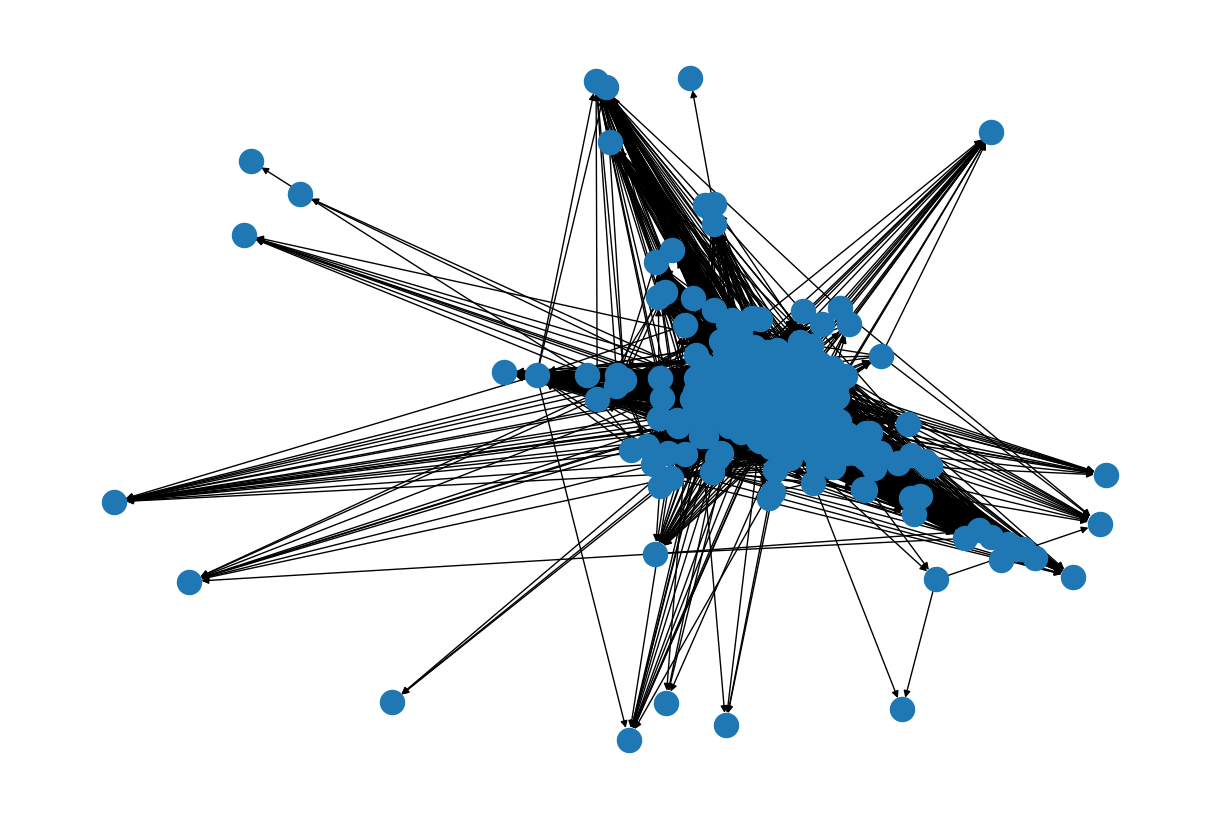

In [11]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1500x1000 with 0 Axes>

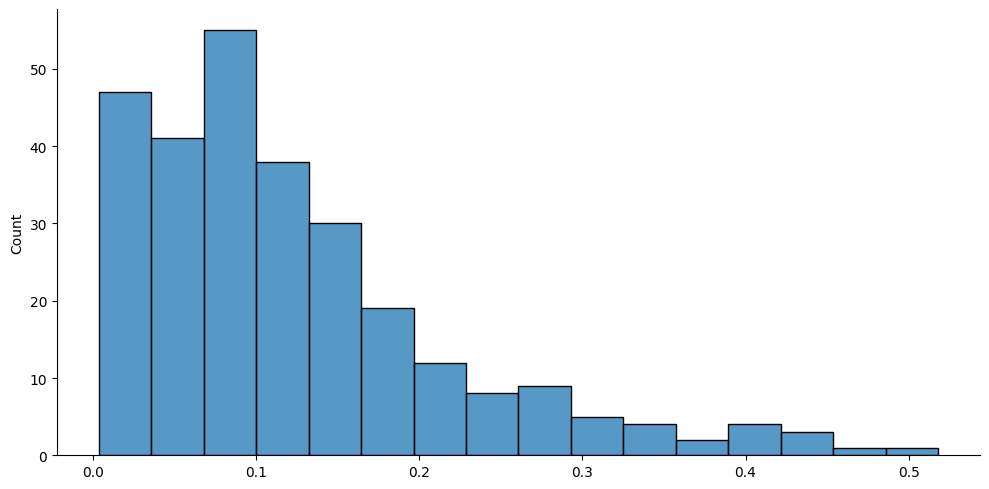

In [12]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

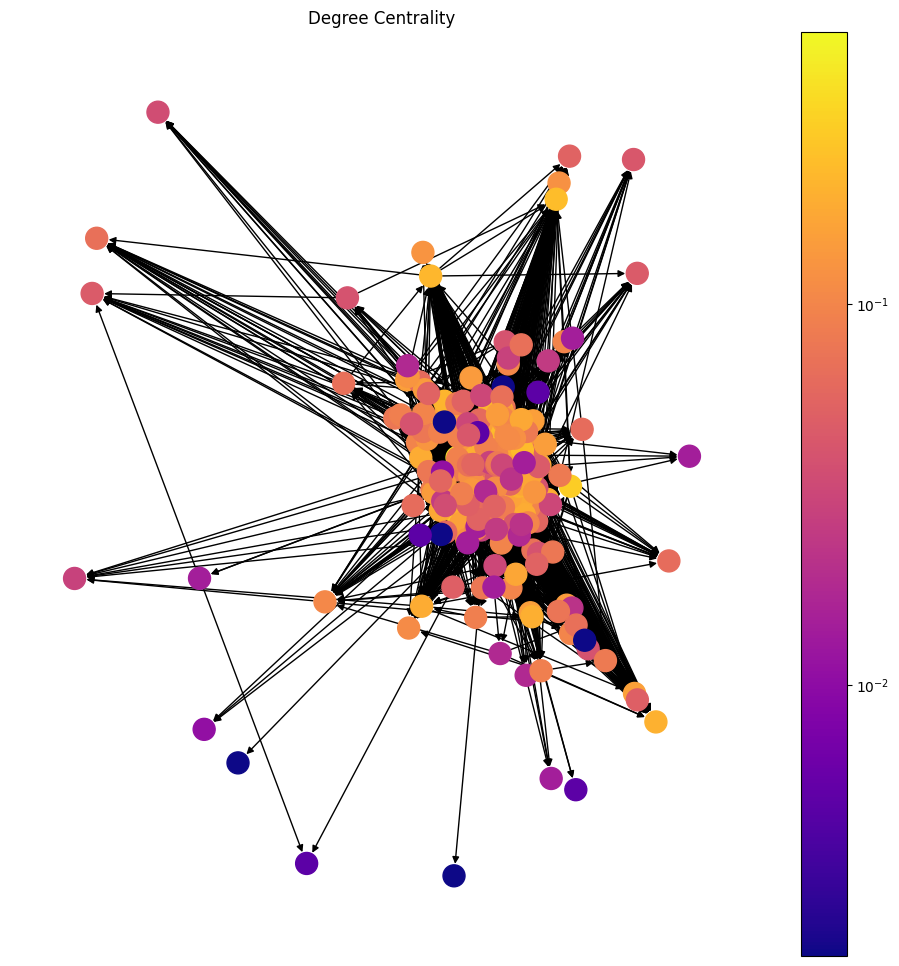

In [13]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

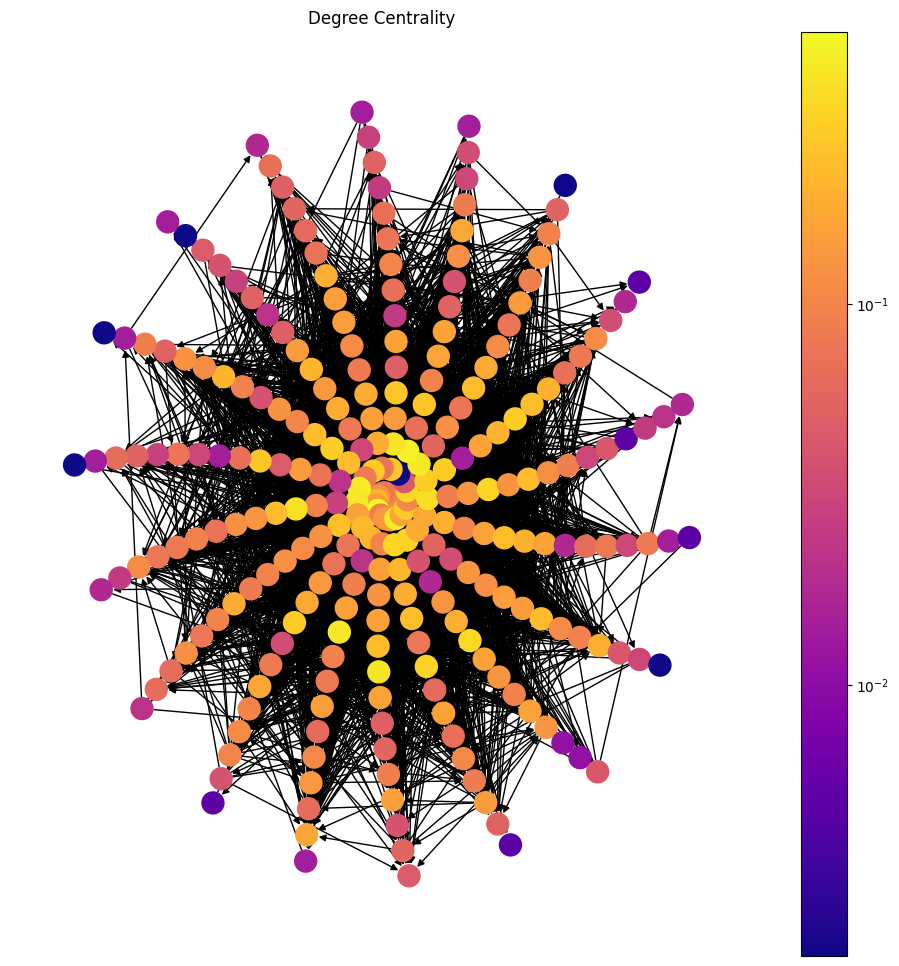

In [14]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{36: '#3173a1', 67: '#e0802c', 127: '#3a913a', 176: '#c03c3d', 290: '#9371b2', 467: '#835b53', 777: '#d584bc', 1297: '#7f7f7f', 1476: '#a8a935', 1593: '#2dabb8'}


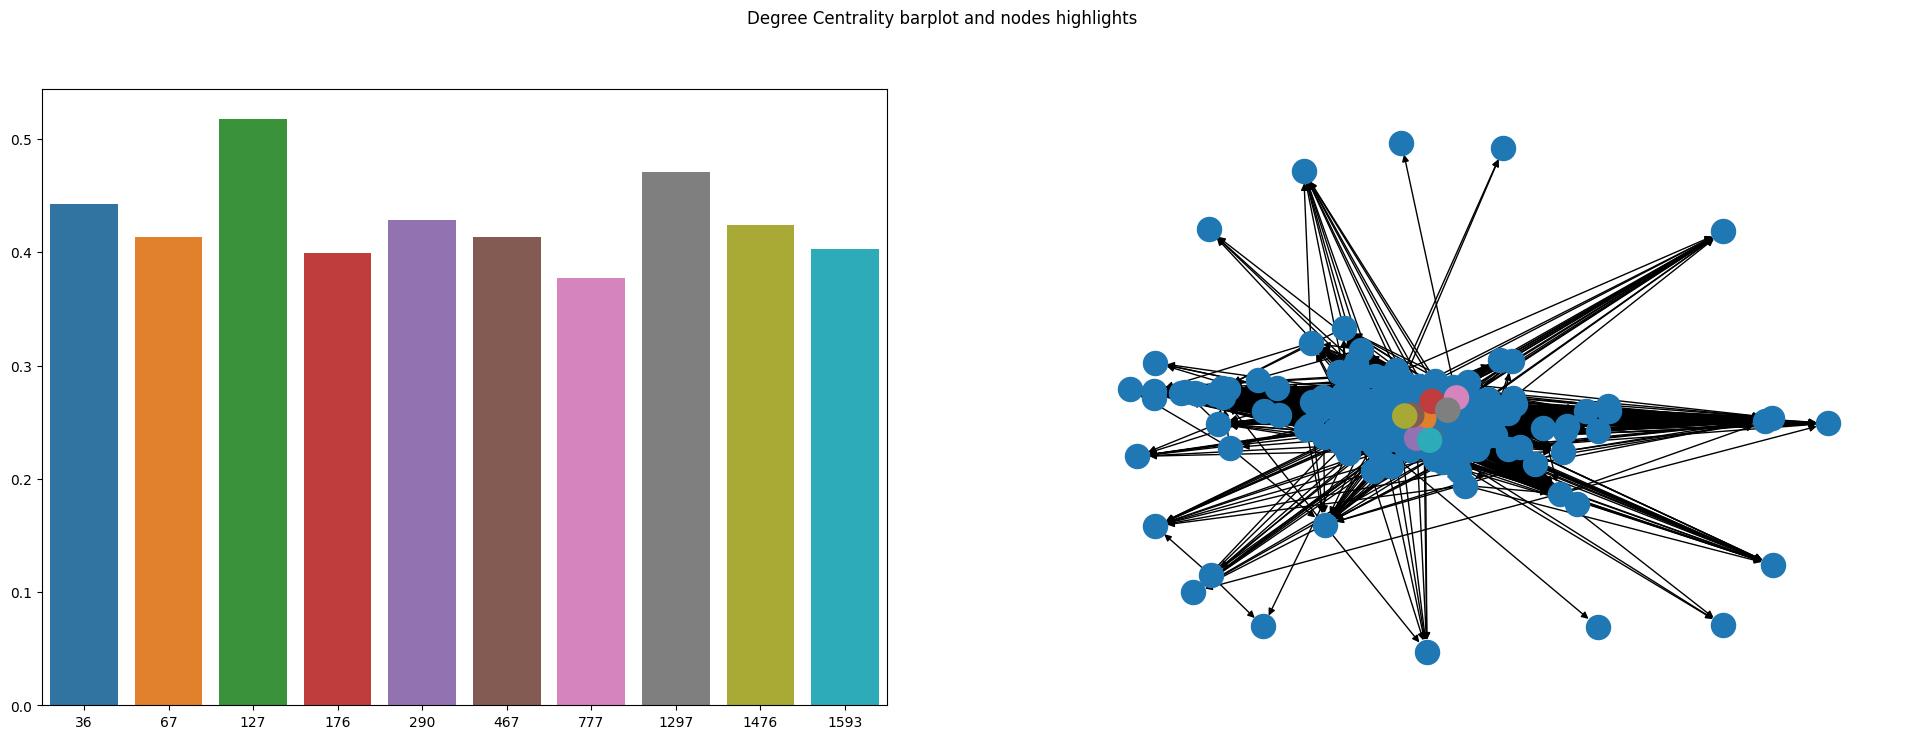

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [15]:
dizionario_colori = barplot_nodes(graph,degree, "Degree")

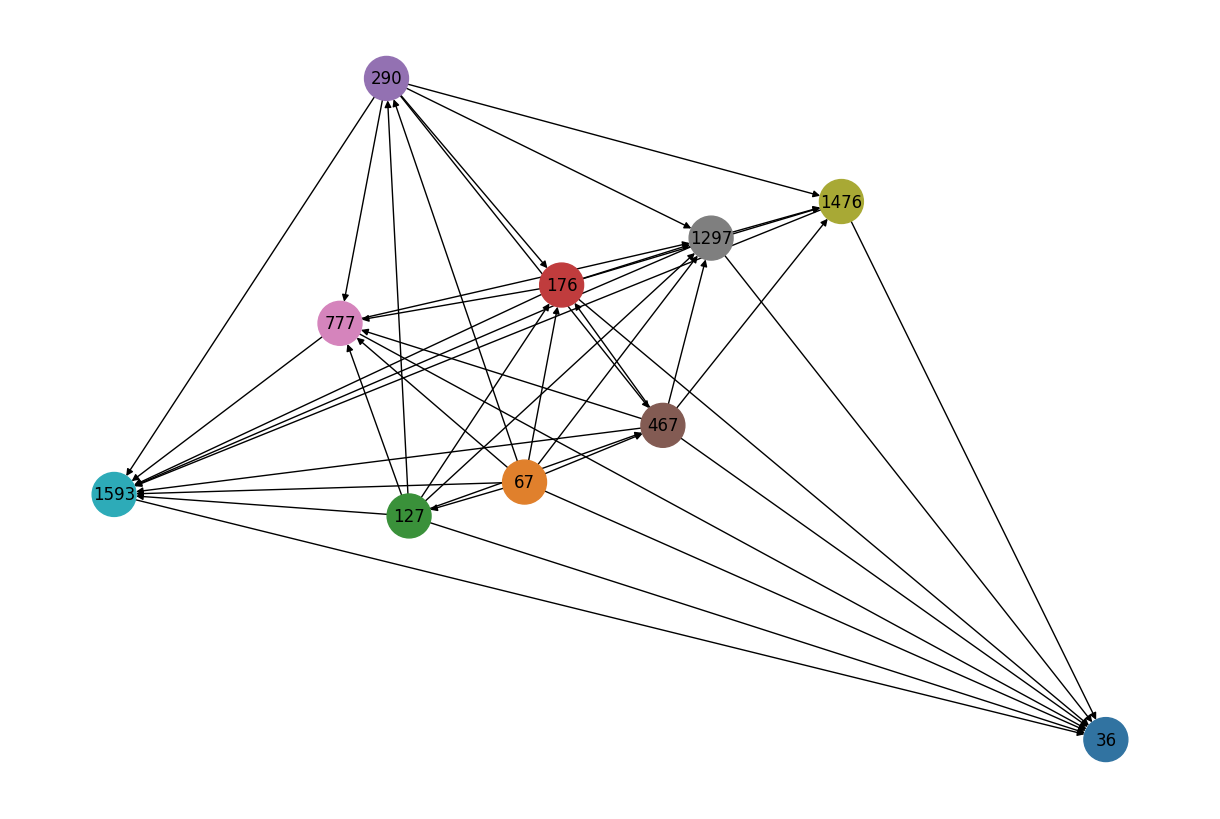

In [16]:
important_node_centrality_plot(degree, df_edge, dizionario_colori)

Betweenness Centrality

<Figure size 1500x1000 with 0 Axes>

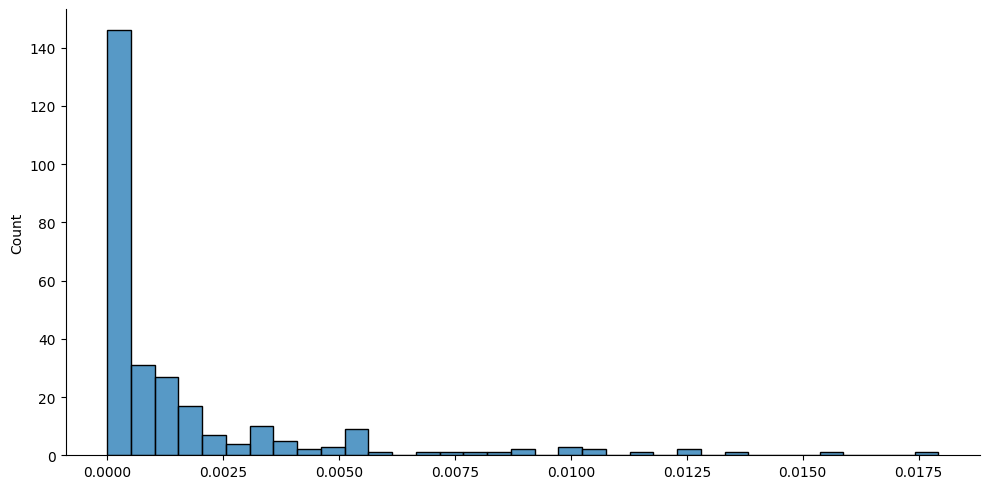

In [17]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

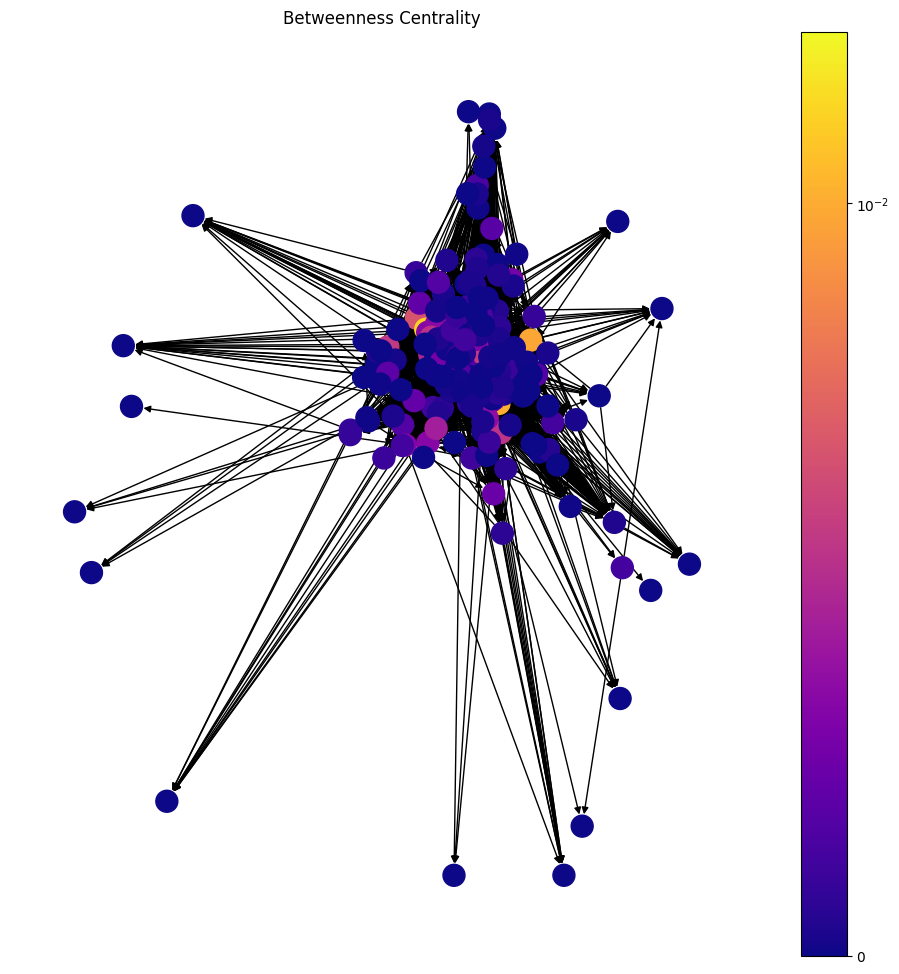

In [18]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

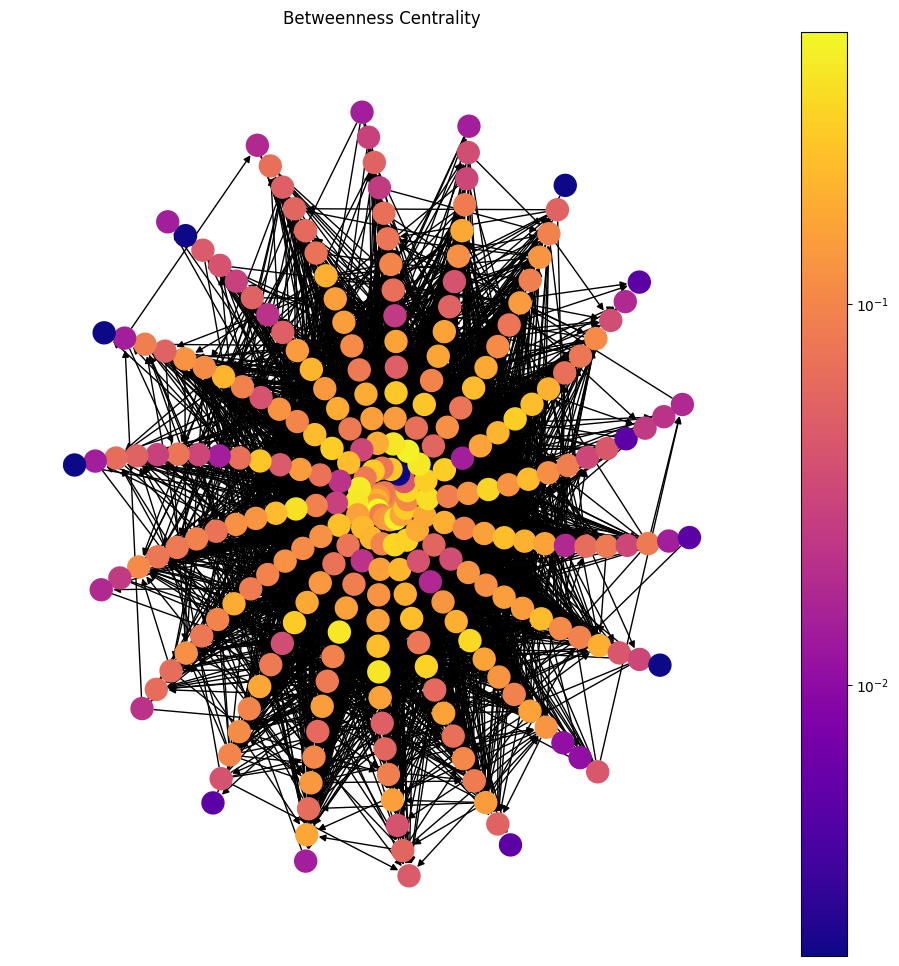

In [19]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{36: '#3173a1', 176: '#e0802c', 290: '#3a913a', 467: '#c03c3d', 471: '#9371b2', 504: '#835b53', 777: '#d584bc', 1297: '#7f7f7f', 1476: '#a8a935', 1593: '#2dabb8'}


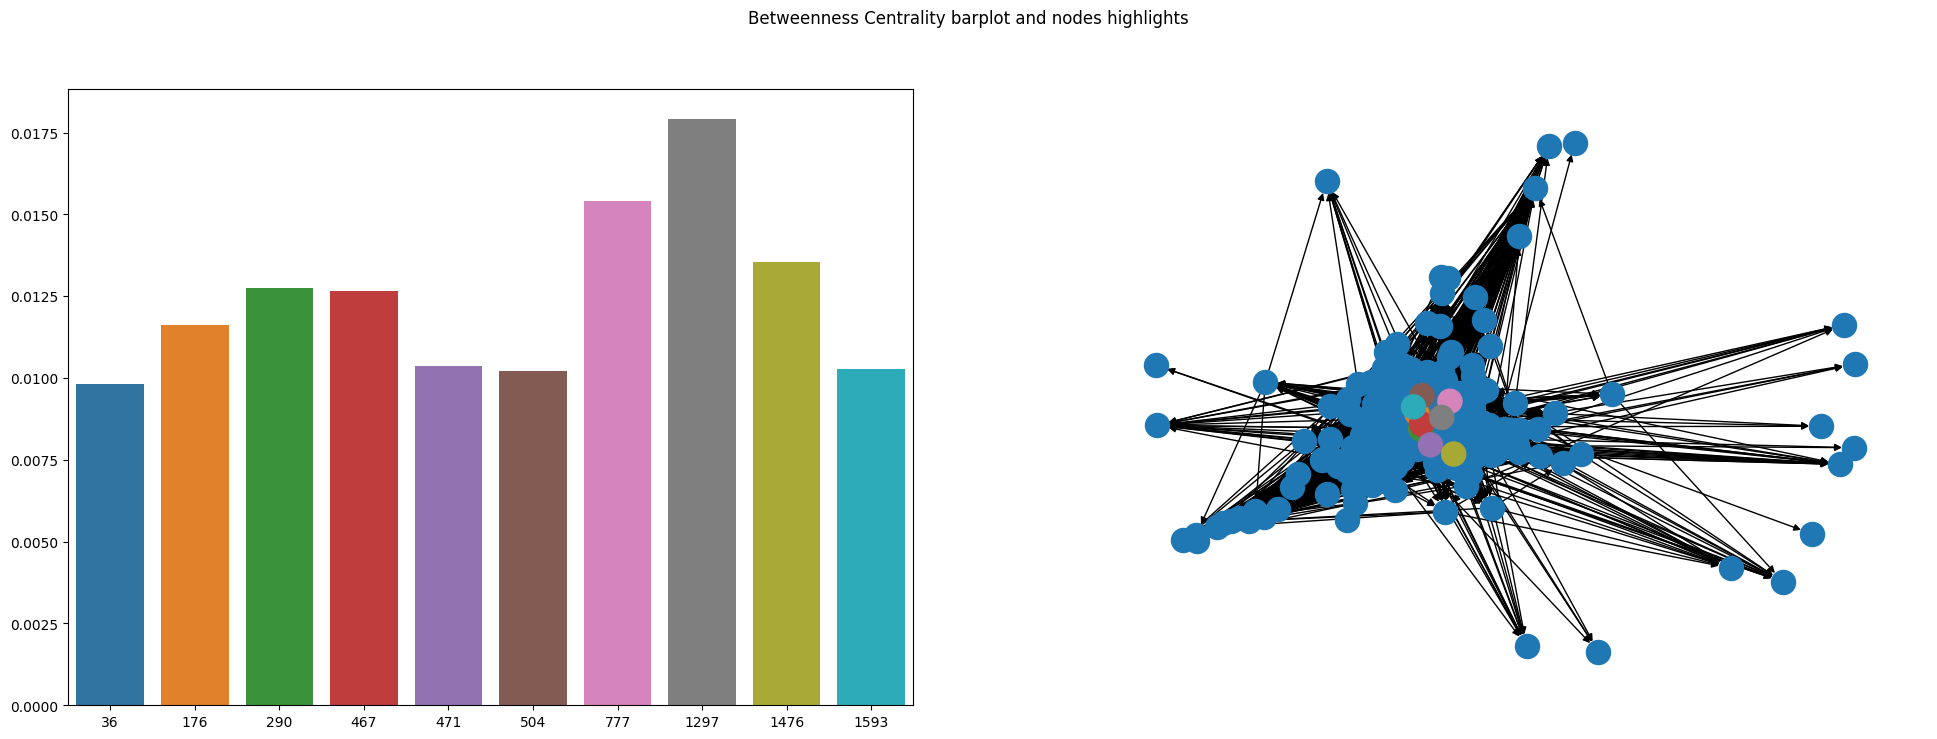

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [20]:
dizionario_colori = barplot_nodes(graph,bet, "Betweenness")

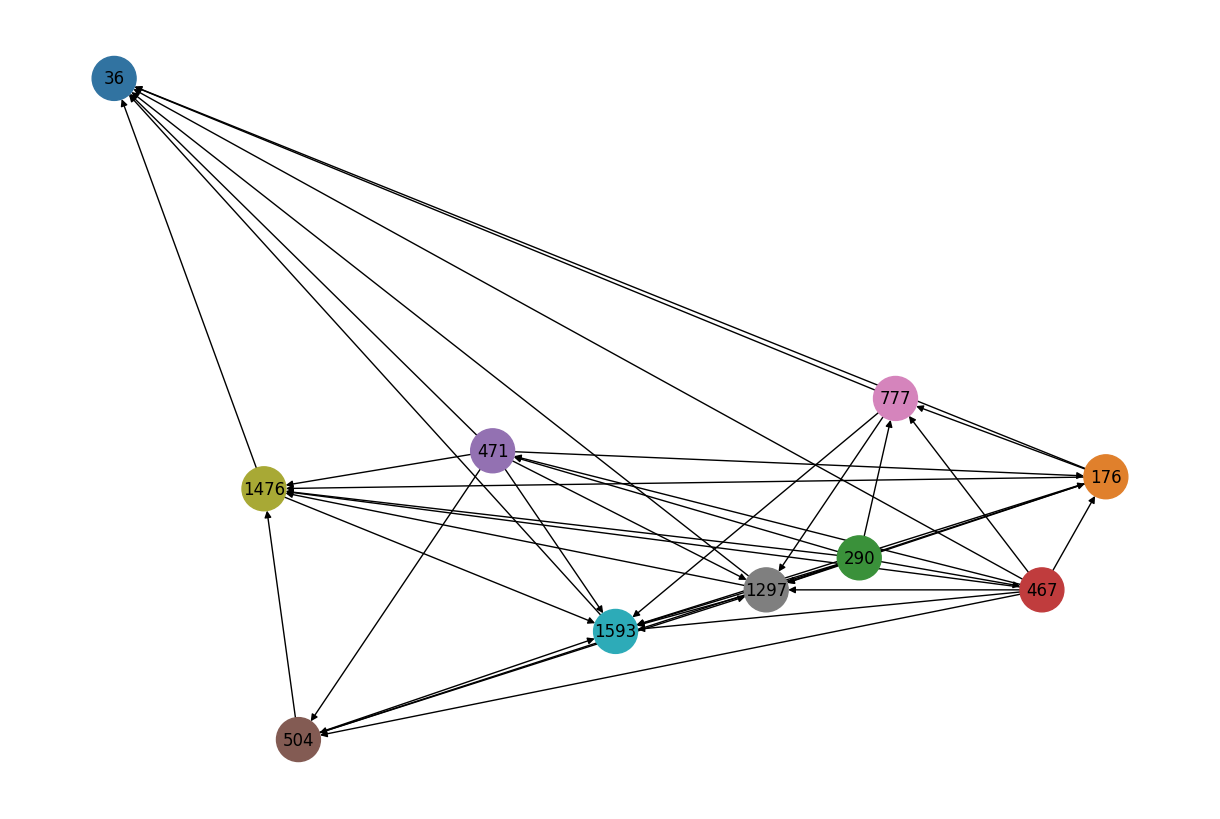

In [21]:
important_node_centrality_plot(bet, df_edge, dizionario_colori)

Closeness Centrality

<Figure size 1500x1000 with 0 Axes>

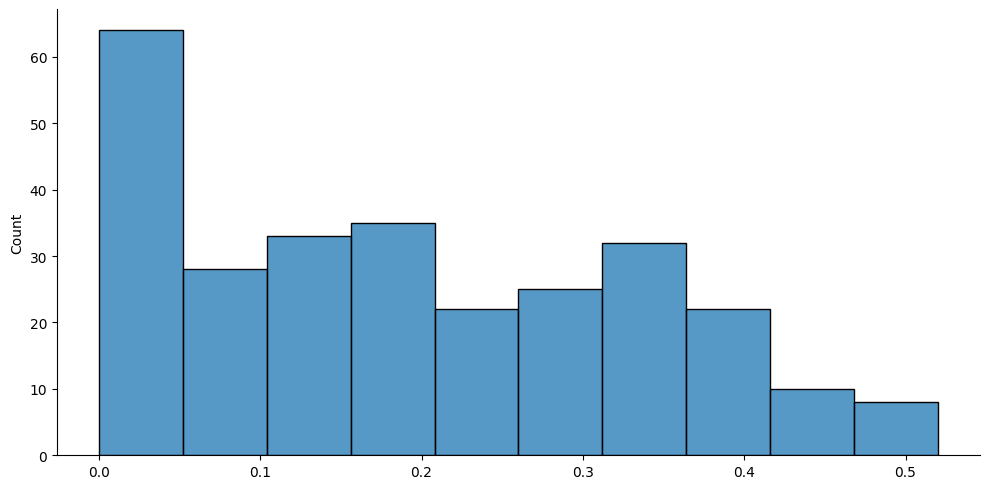

In [22]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

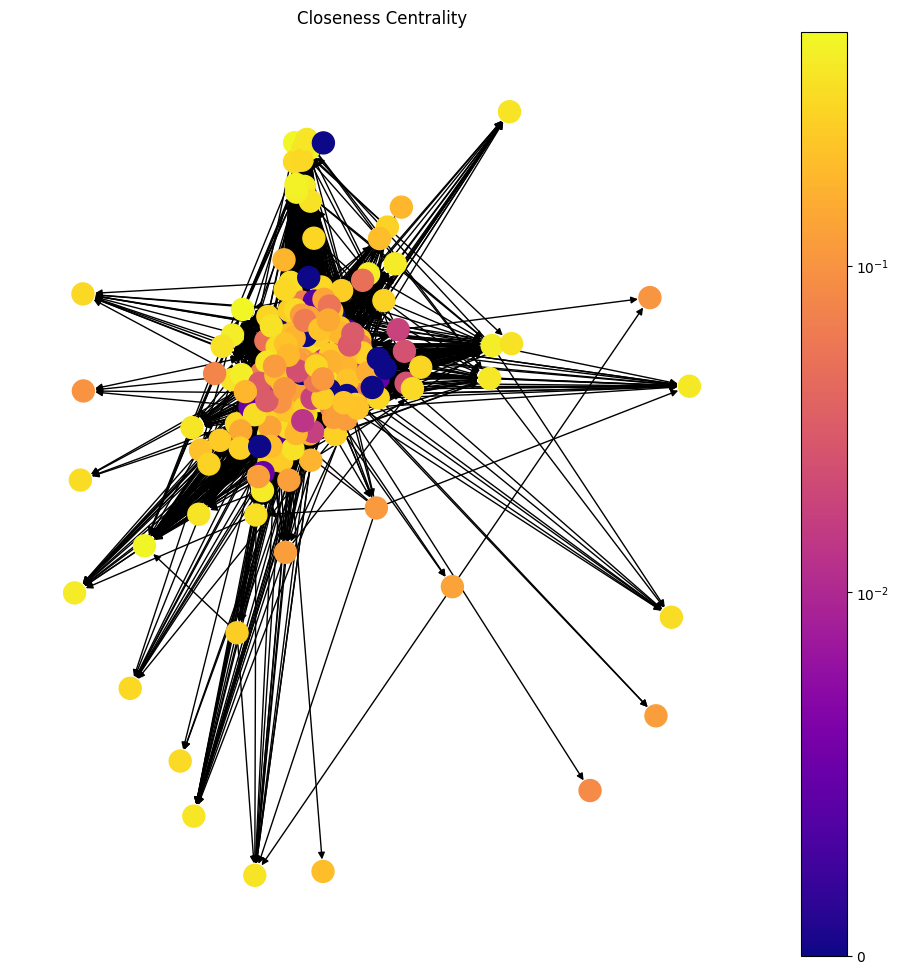

In [23]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

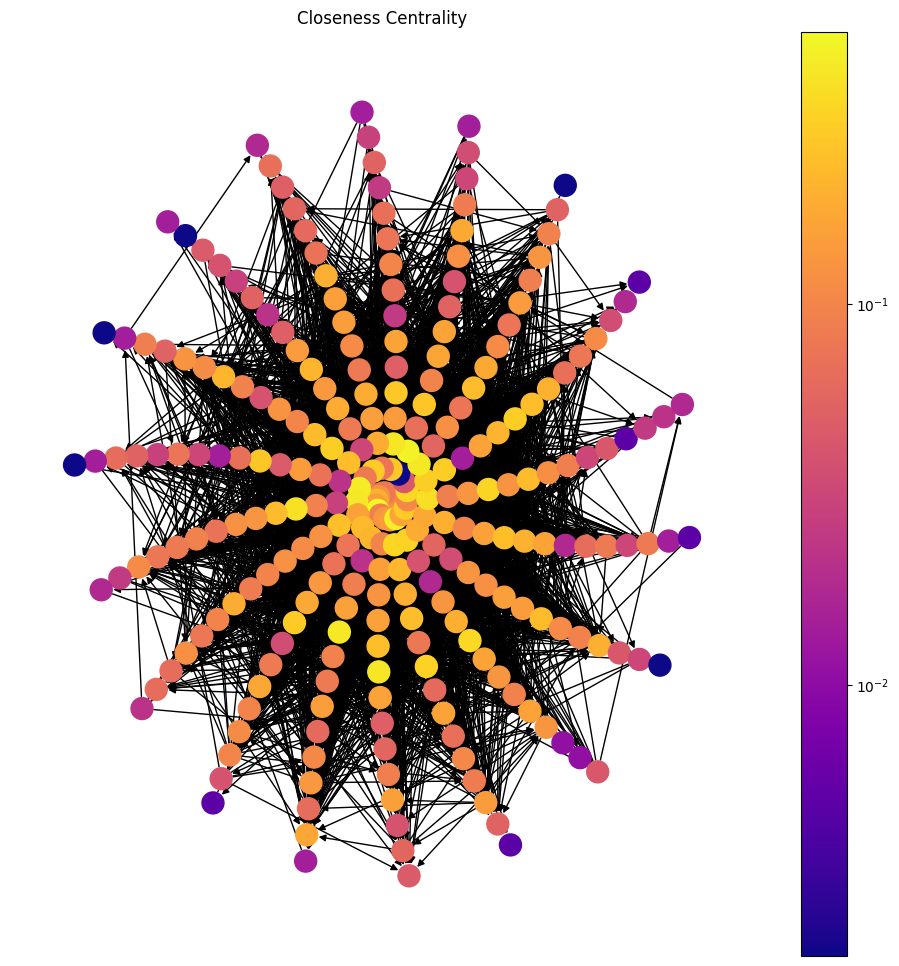

In [24]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{36: '#3173a1', 1320: '#e0802c', 1476: '#3a913a', 1593: '#c03c3d', 1739: '#9371b2', 1758: '#835b53', 1787: '#d584bc', 1821: '#7f7f7f', 1844: '#a8a935', 1867: '#2dabb8'}


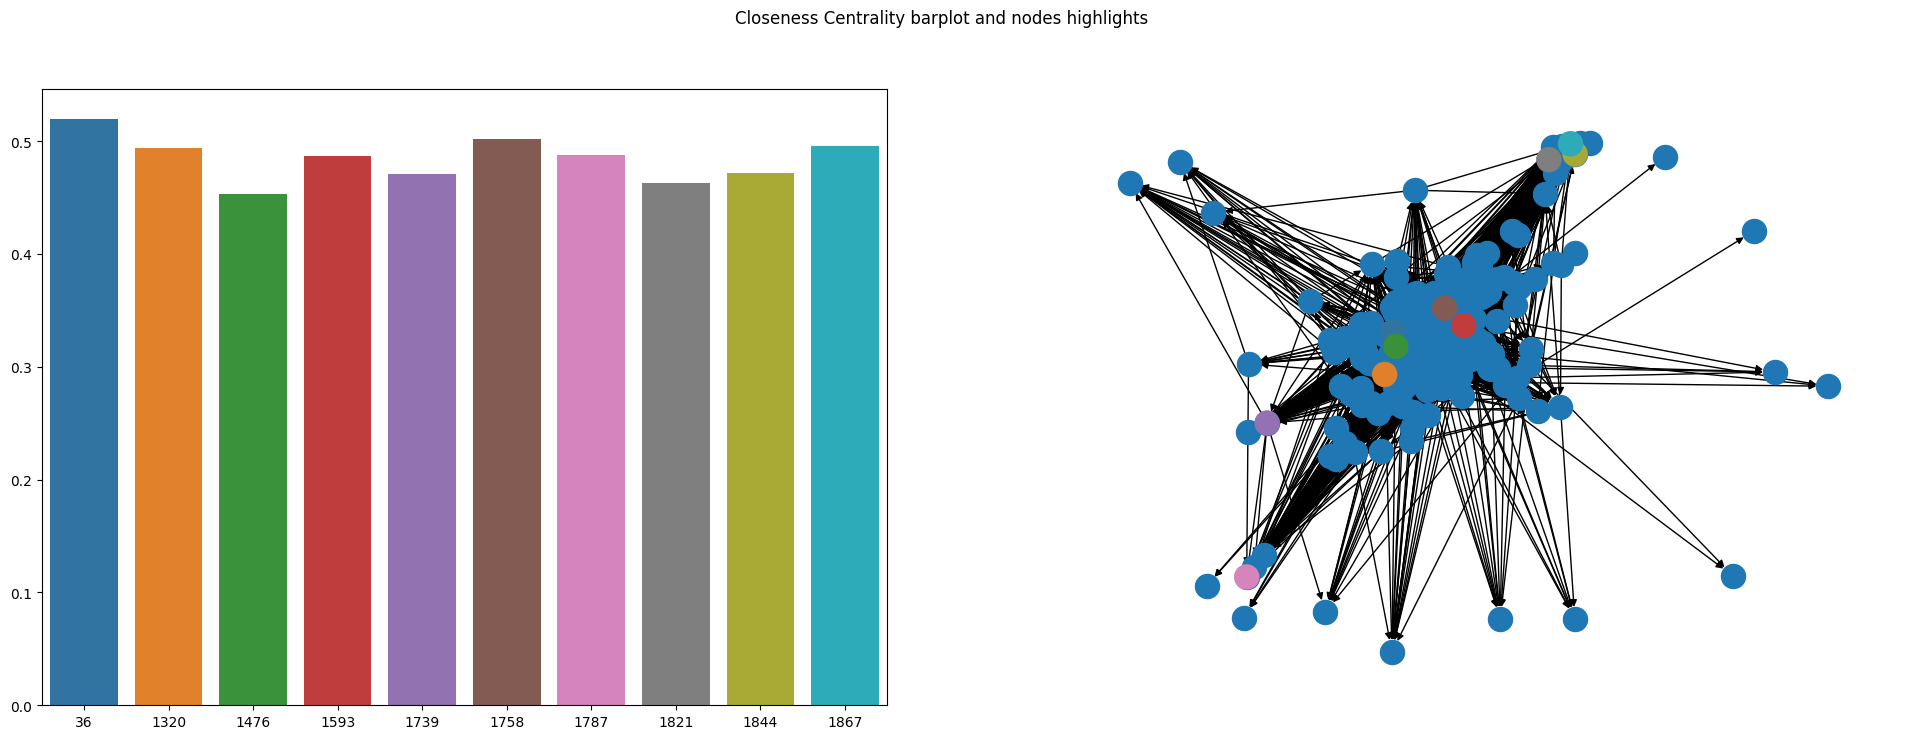

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [25]:
dizionario_colori = barplot_nodes(graph,clos, "Closeness")

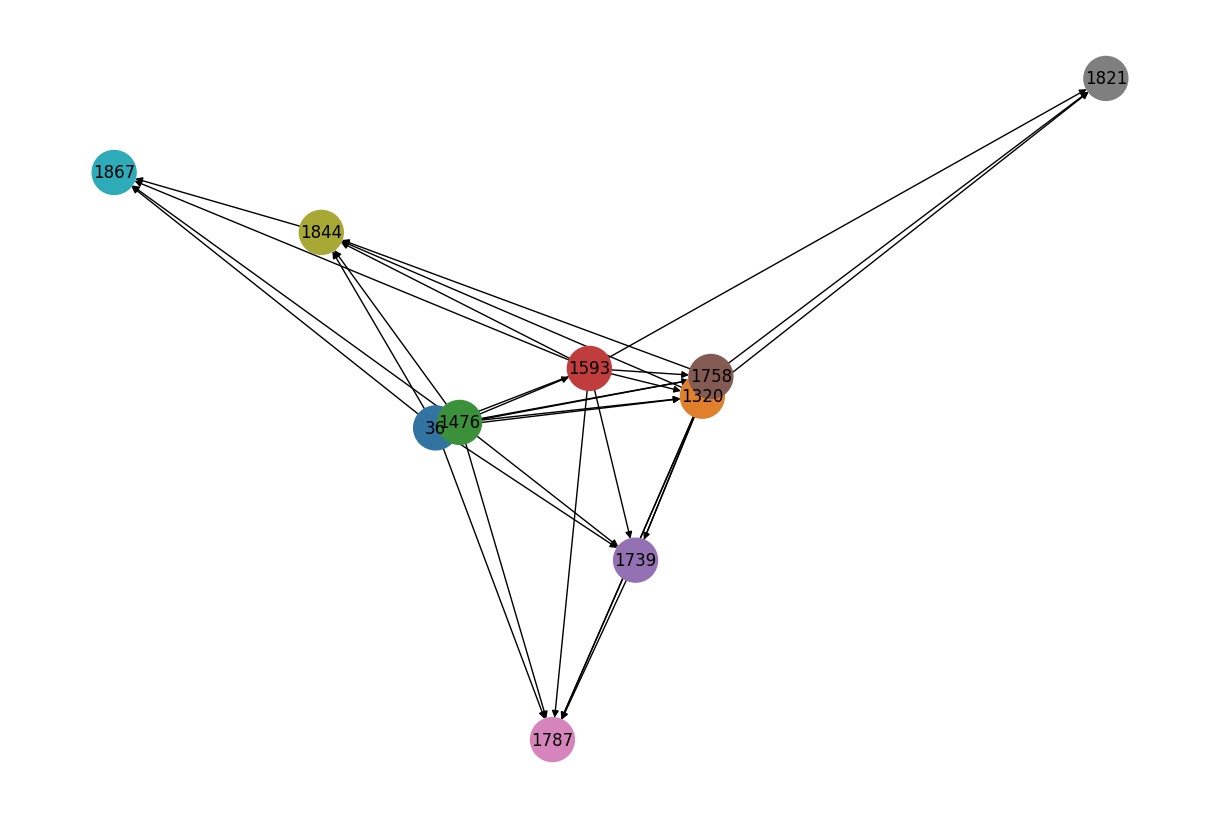

In [26]:
important_node_centrality_plot(clos, df_edge, dizionario_colori)

Eigenvector Centrality

C:\Users\sam\AppData\Local\Temp\ipykernel_16452\1676484988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot: ylabel='Density'>

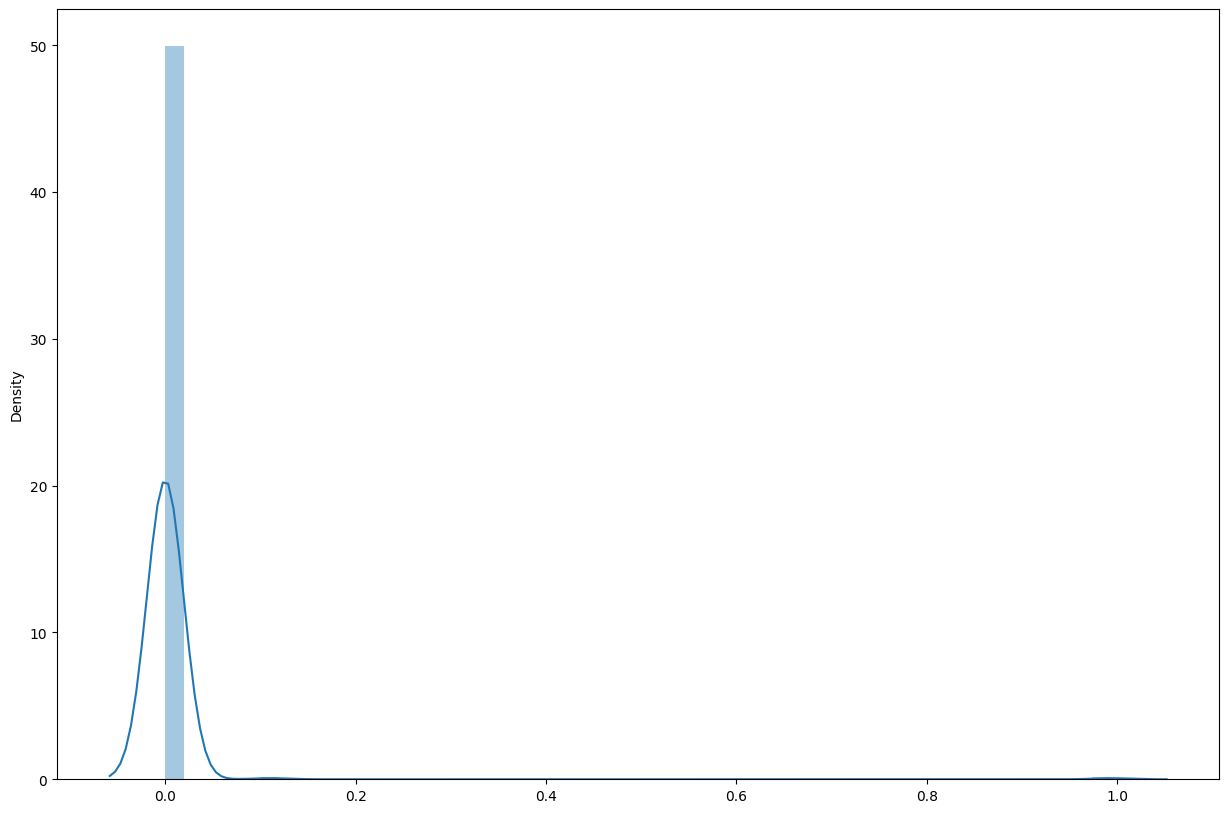

In [27]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

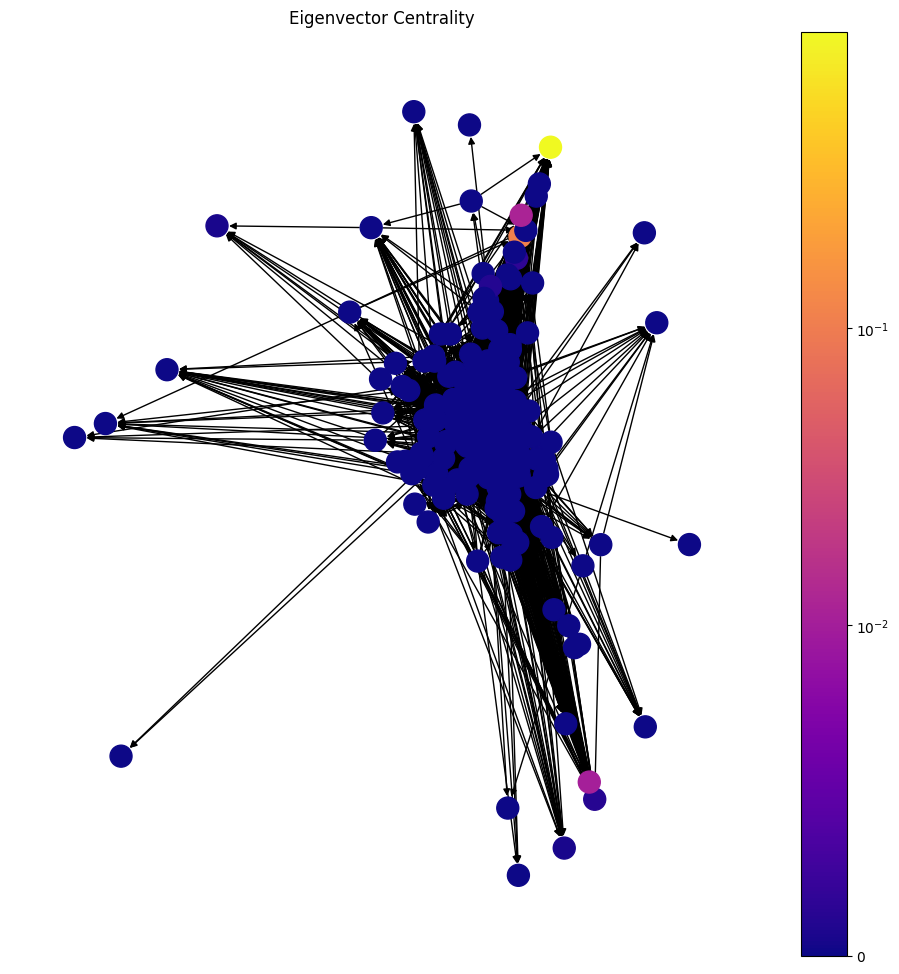

In [28]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

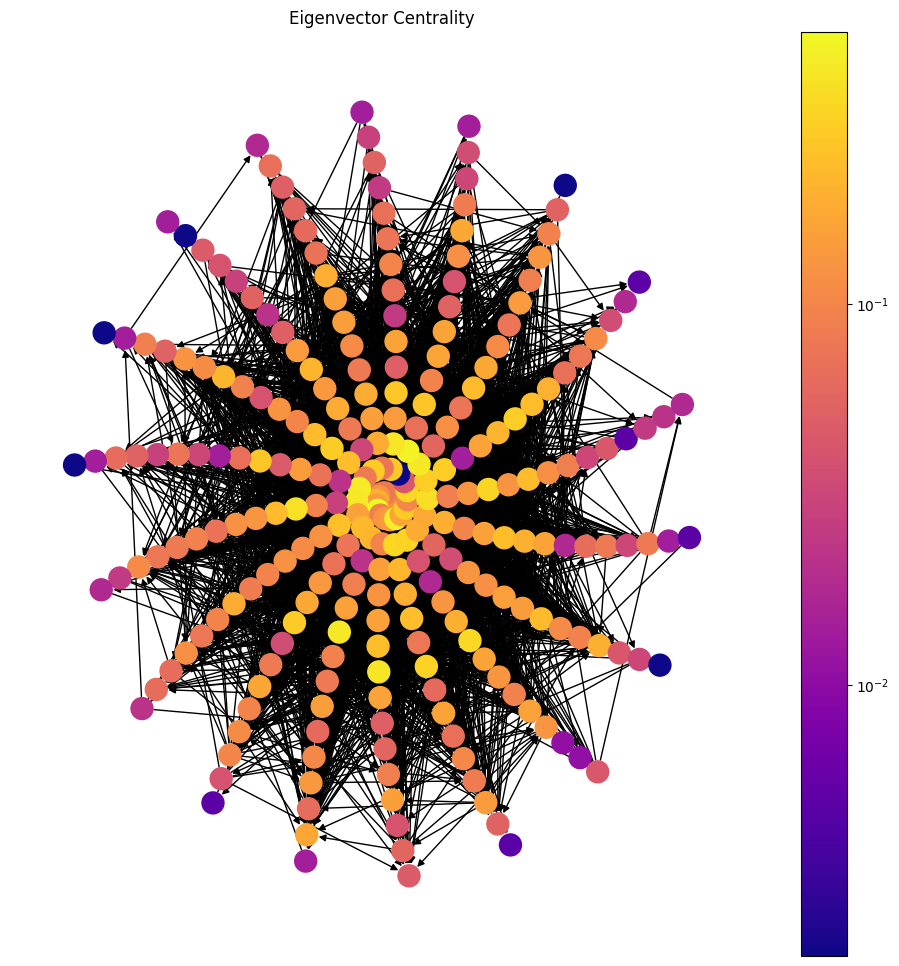

In [29]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{1758: '#3173a1', 1776: '#e0802c', 1787: '#3a913a', 1802: '#c03c3d', 1807: '#9371b2', 1821: '#835b53', 1825: '#d584bc', 1837: '#7f7f7f', 1844: '#a8a935', 1867: '#2dabb8'}


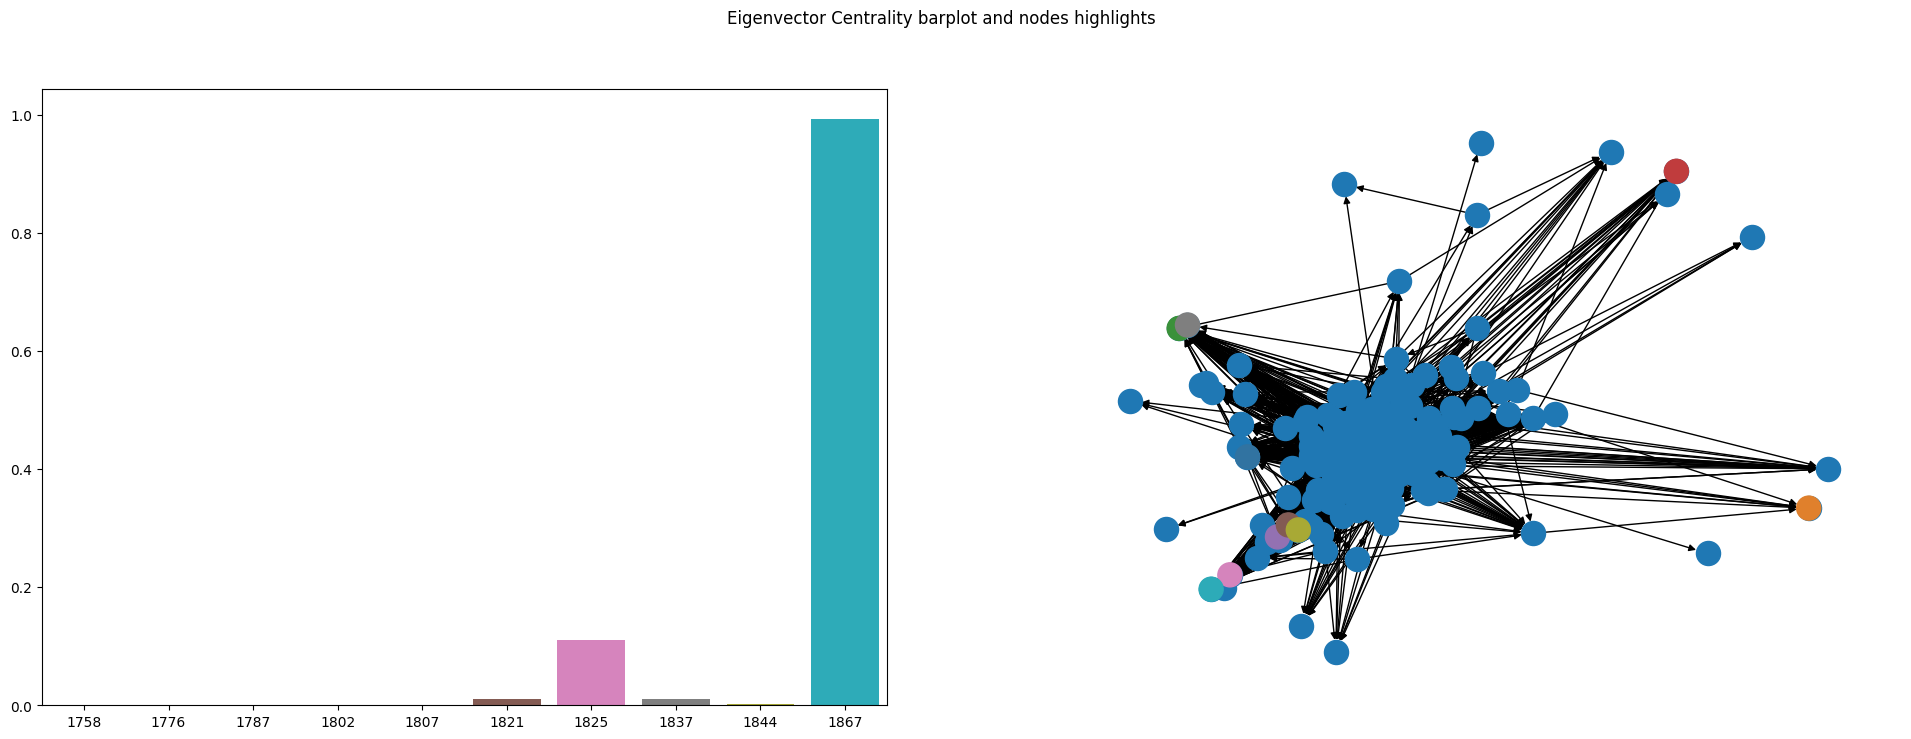

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [30]:
dizionario_colori = barplot_nodes(graph,eigv, "Eigenvector")

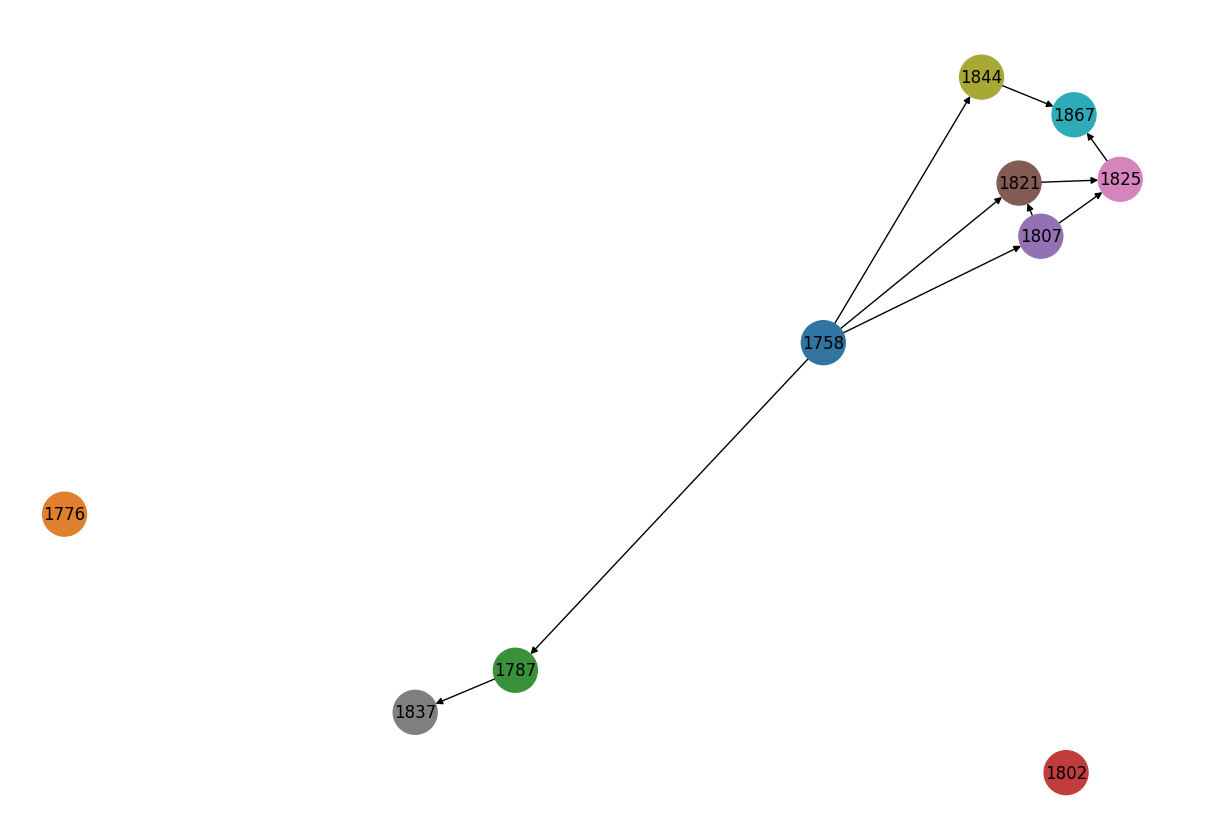

In [31]:
important_node_centrality_plot(eigv, df_edge, dizionario_colori)

PageRank

<Figure size 1500x1000 with 0 Axes>

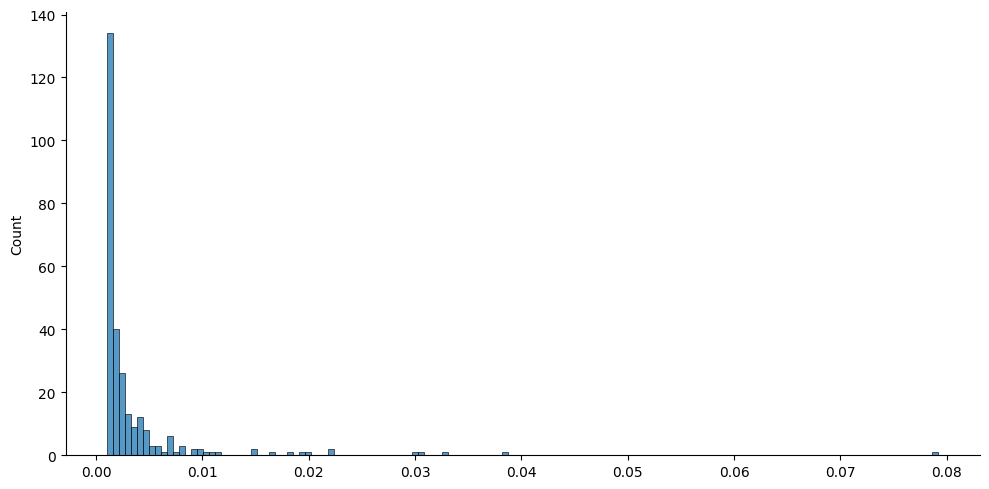

In [32]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

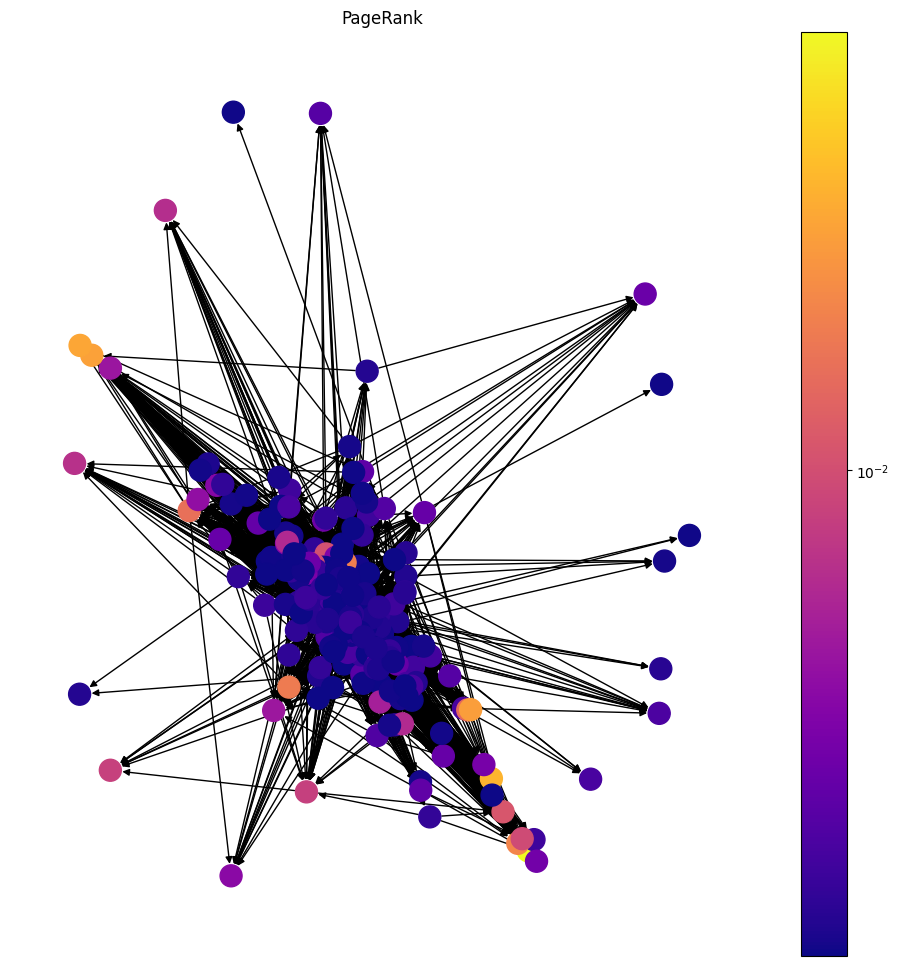

In [33]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

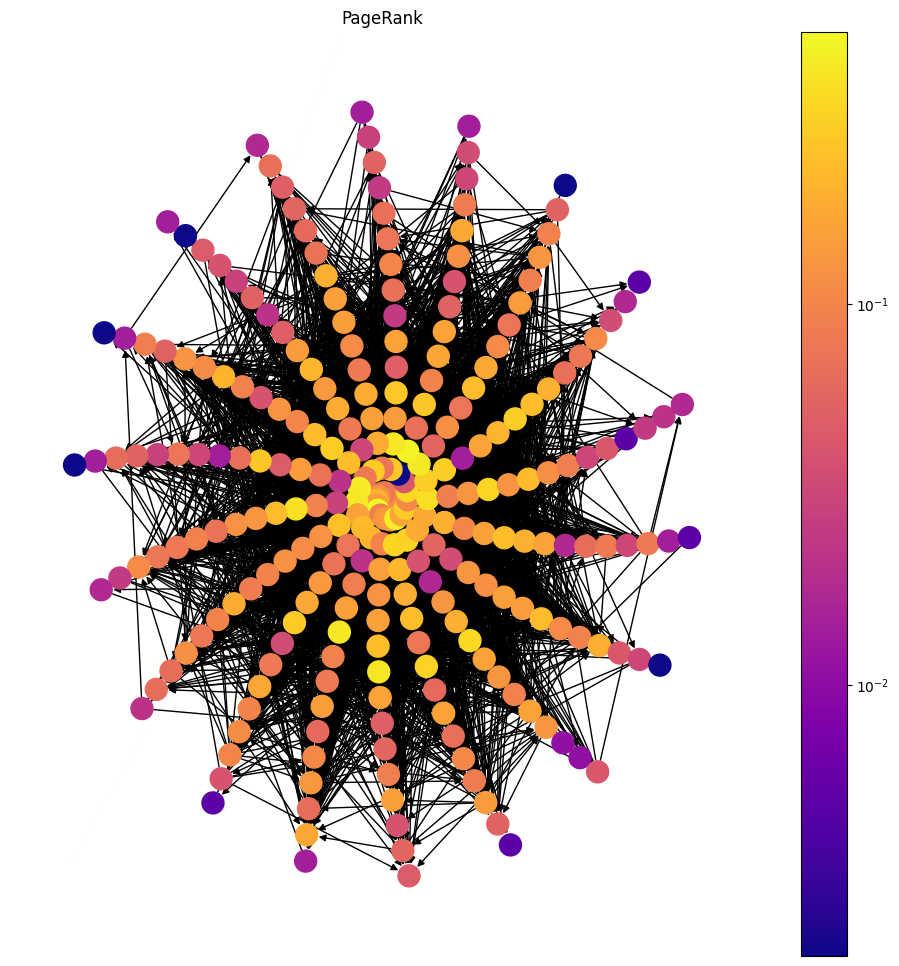

In [34]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti

{36: '#3173a1', 1320: '#e0802c', 1758: '#3a913a', 1763: '#c03c3d', 1787: '#9371b2', 1821: '#835b53', 1825: '#d584bc', 1837: '#7f7f7f', 1844: '#a8a935', 1867: '#2dabb8'}


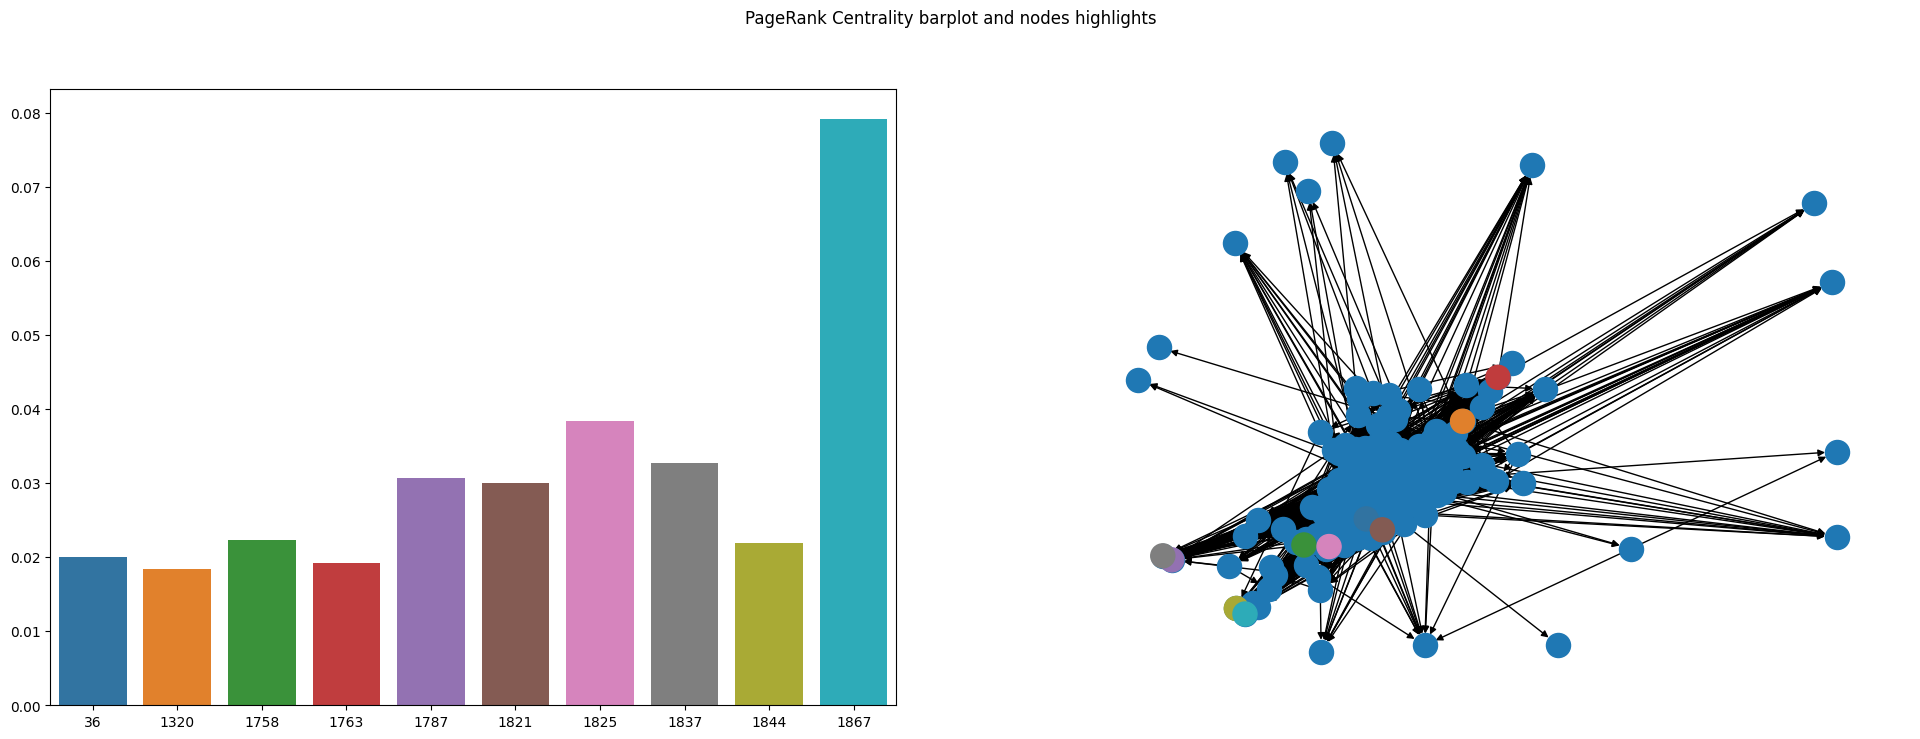

<Figure size 1500x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [35]:
dizionario_colori = barplot_nodes(graph, pager, "PageRank")

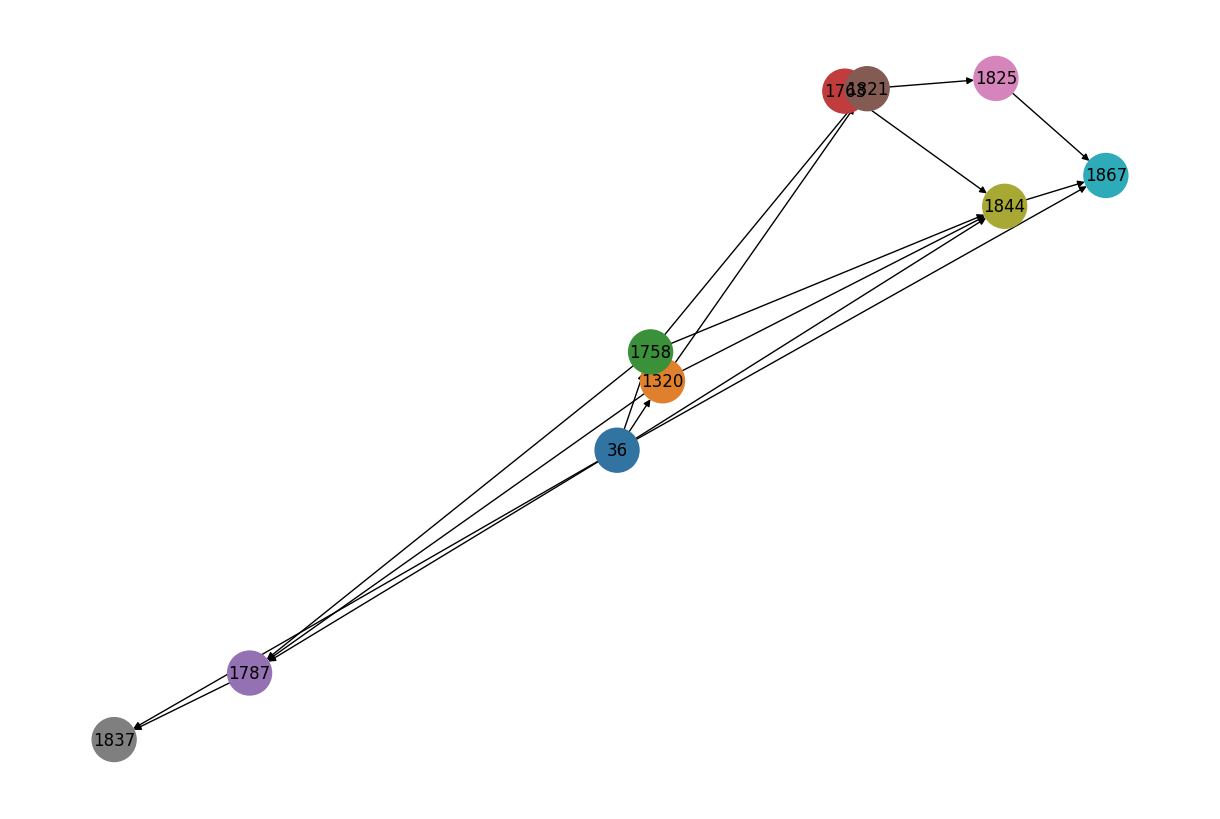

In [36]:
important_node_centrality_plot(pager, df_edge, dizionario_colori)

### Analisi delle strutture

Communites

In [37]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)

In [38]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.spring_layout(graph)
    return graph

def visualizza(graph,dizionario,k):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14, 6))
    fig.suptitle('Community '+str(k+1))
    colors = sns.color_palette('pastel')[0:5]
    ax1.pie([dizionario["mature"],dizionario["not_mature"]], labels = ["Mature","Not Mature"], colors = ["#FF7514","#008f39"], autopct='%.0f%%')
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos,ax=ax2,node_size=300,font_size=6)
    nx.\
       draw_networkx_nodes(graph, pos, nodelist=list(dizionario["colors"].keys()), node_color=list(dizionario["colors"].values()))\
       .set_edgecolor('k') 

In [39]:
dictionary = {}
k=0
mature_color="#FF7514"
not_mature_color="#008f39"
for c in communities:
    mature = 0
    not_mature = 0
    supp_dic={}
    supp_dic_2 = {}
    supp_list=[]
    views = []
    total_views=0
    for el in c:
        node = df_target[df_target["new_id"]==el]
        total_views += int(node["views"])
        views.append(int(node["views"]))
        if node["mature"].bool(): 
            supp_dic[el]=mature_color
            mature+=1
        else:
            supp_dic[el]=not_mature_color
            not_mature+=1
    supp_dic_2["colors"] = supp_dic
    supp_dic_2["mature"] = mature
    supp_dic_2["not_mature"] = not_mature
    supp_dic_2["mean_views"] = round(total_views/len(c),2)
    supp_dic_2["dev_standard_views"] = np.std(views)
    print(supp_dic_2["dev_standard_views"])
    dictionary[k] = supp_dic_2
    k+=1



12992750.025765833
1855890.9361607437
4536337.98928354
40557.5


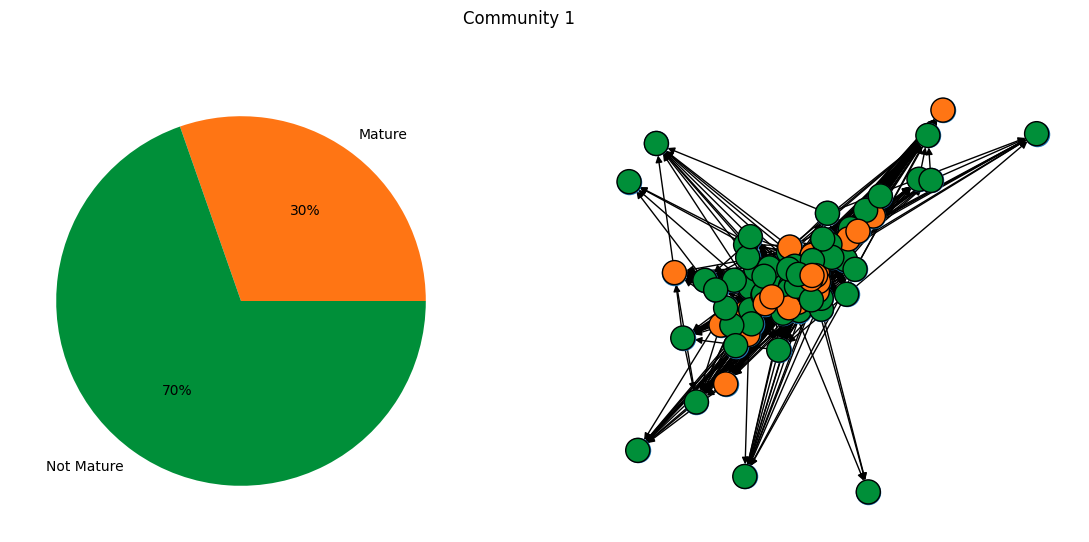

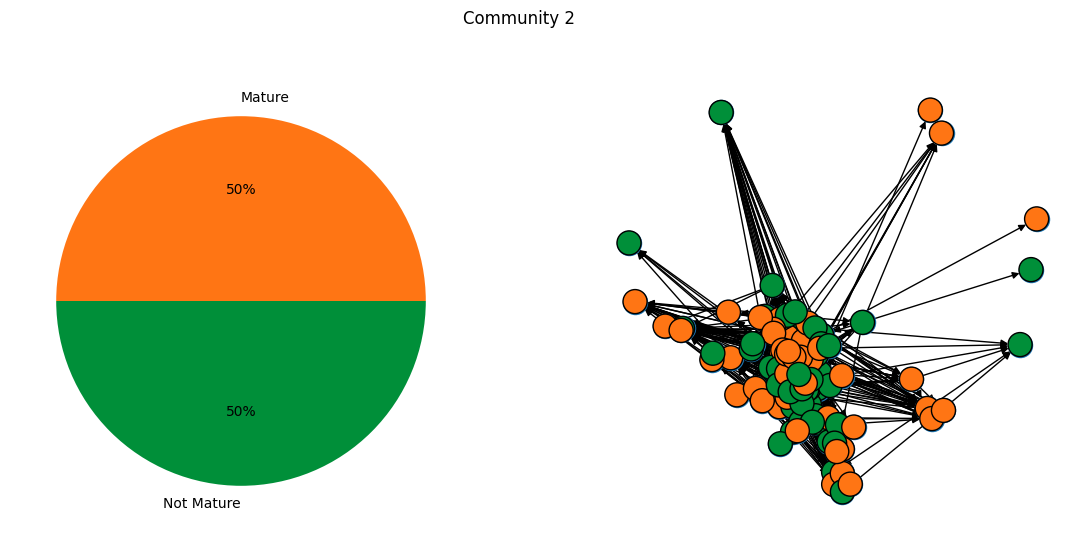

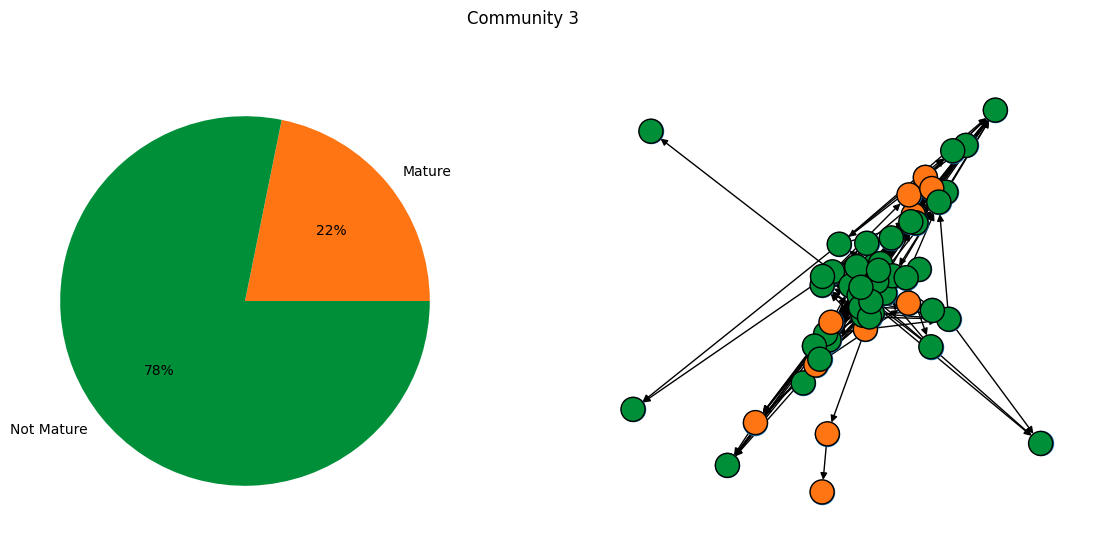

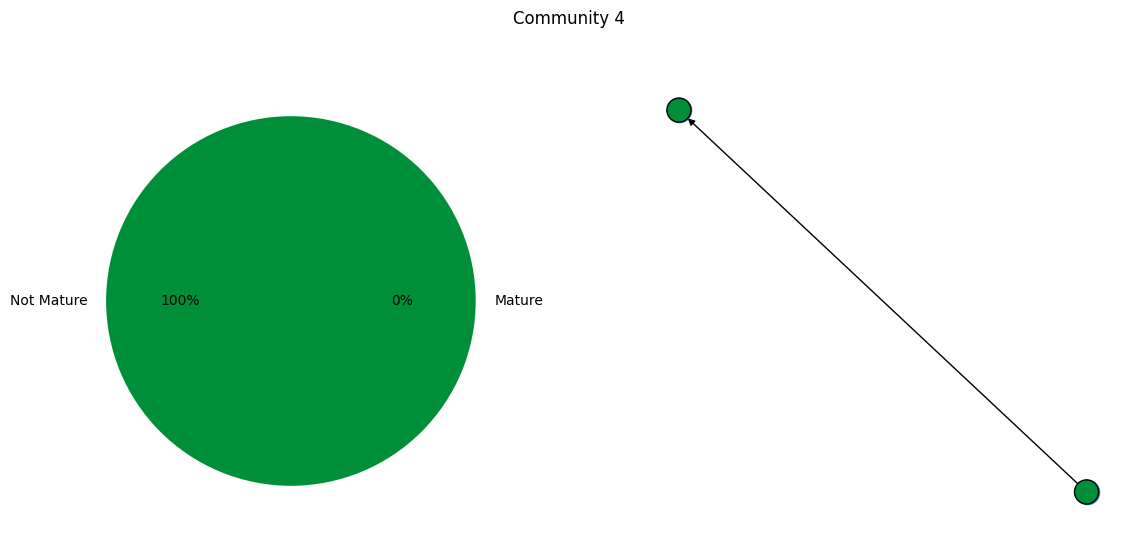

In [40]:
k=0
mean_views = []
dev_standard_views = []
list_communites = []
for c in communities:
    if len(c) == 1:
        continue
    edges = caricamento(c)
    visualizza(grafo(c, edges),dictionary[k],k)
    mean_views.append(dictionary[k]["mean_views"])
    dev_standard_views.append(dictionary[k]["dev_standard_views"])
    list_communites.append("Community "+str(k+1))
    k+=1

[12992750.025765833, 1855890.9361607437, 4536337.98928354, 40557.5]


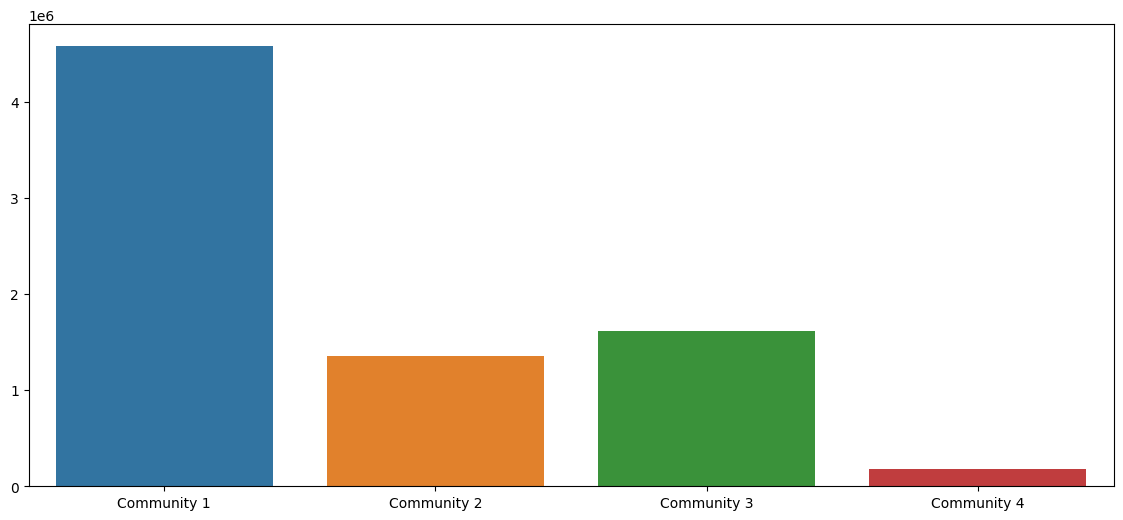

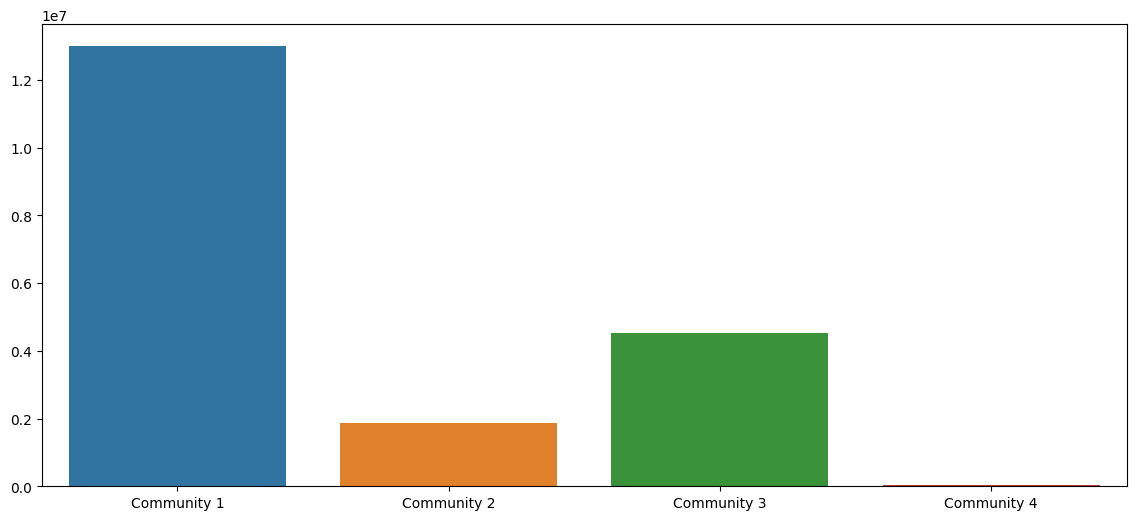

In [41]:
plt.figure(figsize=(14, 6))
sns.barplot(x=list_communites,y= mean_views)
plt.figure(figsize=(14, 6))
sns.barplot(x=list_communites,y= dev_standard_views)
print(dev_standard_views)

Triadi

In [ ]:
from tqdm import tqdm_notebook
def trova_triadi(grafo):
  triadi = {}
  for nodes in tqdm.notebook.tqdm(combinations(grafo.nodes, 3), 
                         total=math.factorial(len(grafo.nodes))/(math.factorial(3)*math.factorial(len(grafo.nodes)-3)), 
                         desc="Processing records"):#combinations(grafo.nodes, 3):
    n_edges = grafo.subgraph(nodes).number_of_edges()
    triadi.setdefault(n_edges, []).append(nodes)
  return(triadi)

In [43]:
triadi = trova_triadi(graph)
print('Triadi del grafo totale: ' + str(len(triadi[1])))

KeyboardInterrupt: 

In [72]:
import tqdm
import time
from tqdm.auto import tqdm
count = 1
print('Triadi per community')

for community in communities:
    
    if len(community) == 1:
        continue
    edge = caricamento(community)
    community_graph = grafo(community,edge)
    #bar = IncrementalBar('Finding Triads in community ' + str(count), max=math.factorial(len(community_graph.nodes))/(math.factorial(3)*math.factorial(len(community_graph.nodes)-3)))
    triadi = {}
    for nodes in tqdm(combinations(community_graph.nodes, 3)):
        n_edges = community_graph.subgraph(nodes).number_of_edges()
        triadi.setdefault(n_edges, []).append(nodes)
        time.sleep(0.01)
        #bar.next()
    #bar.finish()
    if not 1 in triadi: continue
    print("Community " + str(count) + " : " + str(len(triadi[1])))
    count = count + 1

Triadi per community


0it [00:00, ?it/s]

KeyboardInterrupt: 

Clique

In [73]:
#Codice per trovare le Clique
max = 0
max_clique = []
cliques = nx.find_cliques(graph.to_undirected())
for clique in cliques:
    if max < len(clique):
        max = len(clique)
        max_clique = clique
print(max)
print(max_clique)

16
[127, 1297, 467, 290, 1259, 369, 428, 67, 1557, 1621, 441, 1142, 1012, 1593, 176, 35]


K-core

In [74]:
#Codice per trovare K-core
# Calcolo del k-core del grafo (nel caso specifico, k = 3)
k = 3
k_core = nx.k_core(graph, k)
print('k-core con k=3')
print(list(k_core.nodes()))

k_core = nx.k_core(graph)
print('k-core: Main core')
print(list(k_core.nodes()))

k-core con k=3
[2, 287, 689, 417, 656, 1423, 866, 1694, 1443, 1867, 769, 127, 318, 260, 1720, 36, 207, 1287, 298, 471, 1782, 369, 5, 1621, 982, 290, 467, 1245, 717, 1557, 894, 1320, 1259, 1721, 1311, 1660, 1758, 1476, 1297, 1593, 1763, 15, 305, 85, 1843, 1422, 342, 25, 45, 1739, 1669, 1442, 869, 26, 504, 92, 120, 1196, 1137, 250, 1374, 502, 488, 496, 109, 388, 319, 682, 258, 460, 1825, 751, 1351, 33, 560, 654, 928, 1232, 743, 880, 777, 424, 1388, 148, 102, 455, 899, 106, 1844, 1179, 698, 1361, 1372, 332, 492, 893, 1236, 439, 35, 1673, 984, 67, 1036, 1386, 315, 807, 103, 577, 1068, 828, 341, 116, 870, 1829, 429, 628, 1263, 1121, 784, 1354, 176, 1142, 428, 1157, 669, 195, 441, 1012, 1408, 38, 1733, 422, 235, 599, 141, 1328, 204, 704, 1486, 174, 274, 306, 1555, 1376, 1787, 1477, 1164, 1350, 1543, 622, 1581, 55, 637, 59, 1706, 409, 1808, 1433, 95, 868, 1226, 1603, 905, 1105, 1031, 649, 806, 1390, 1666, 1383, 465, 1643, 817, 1416, 61, 1826, 1150, 62, 1802, 988, 731, 996, 173, 1517, 878, 64,

Ego Network

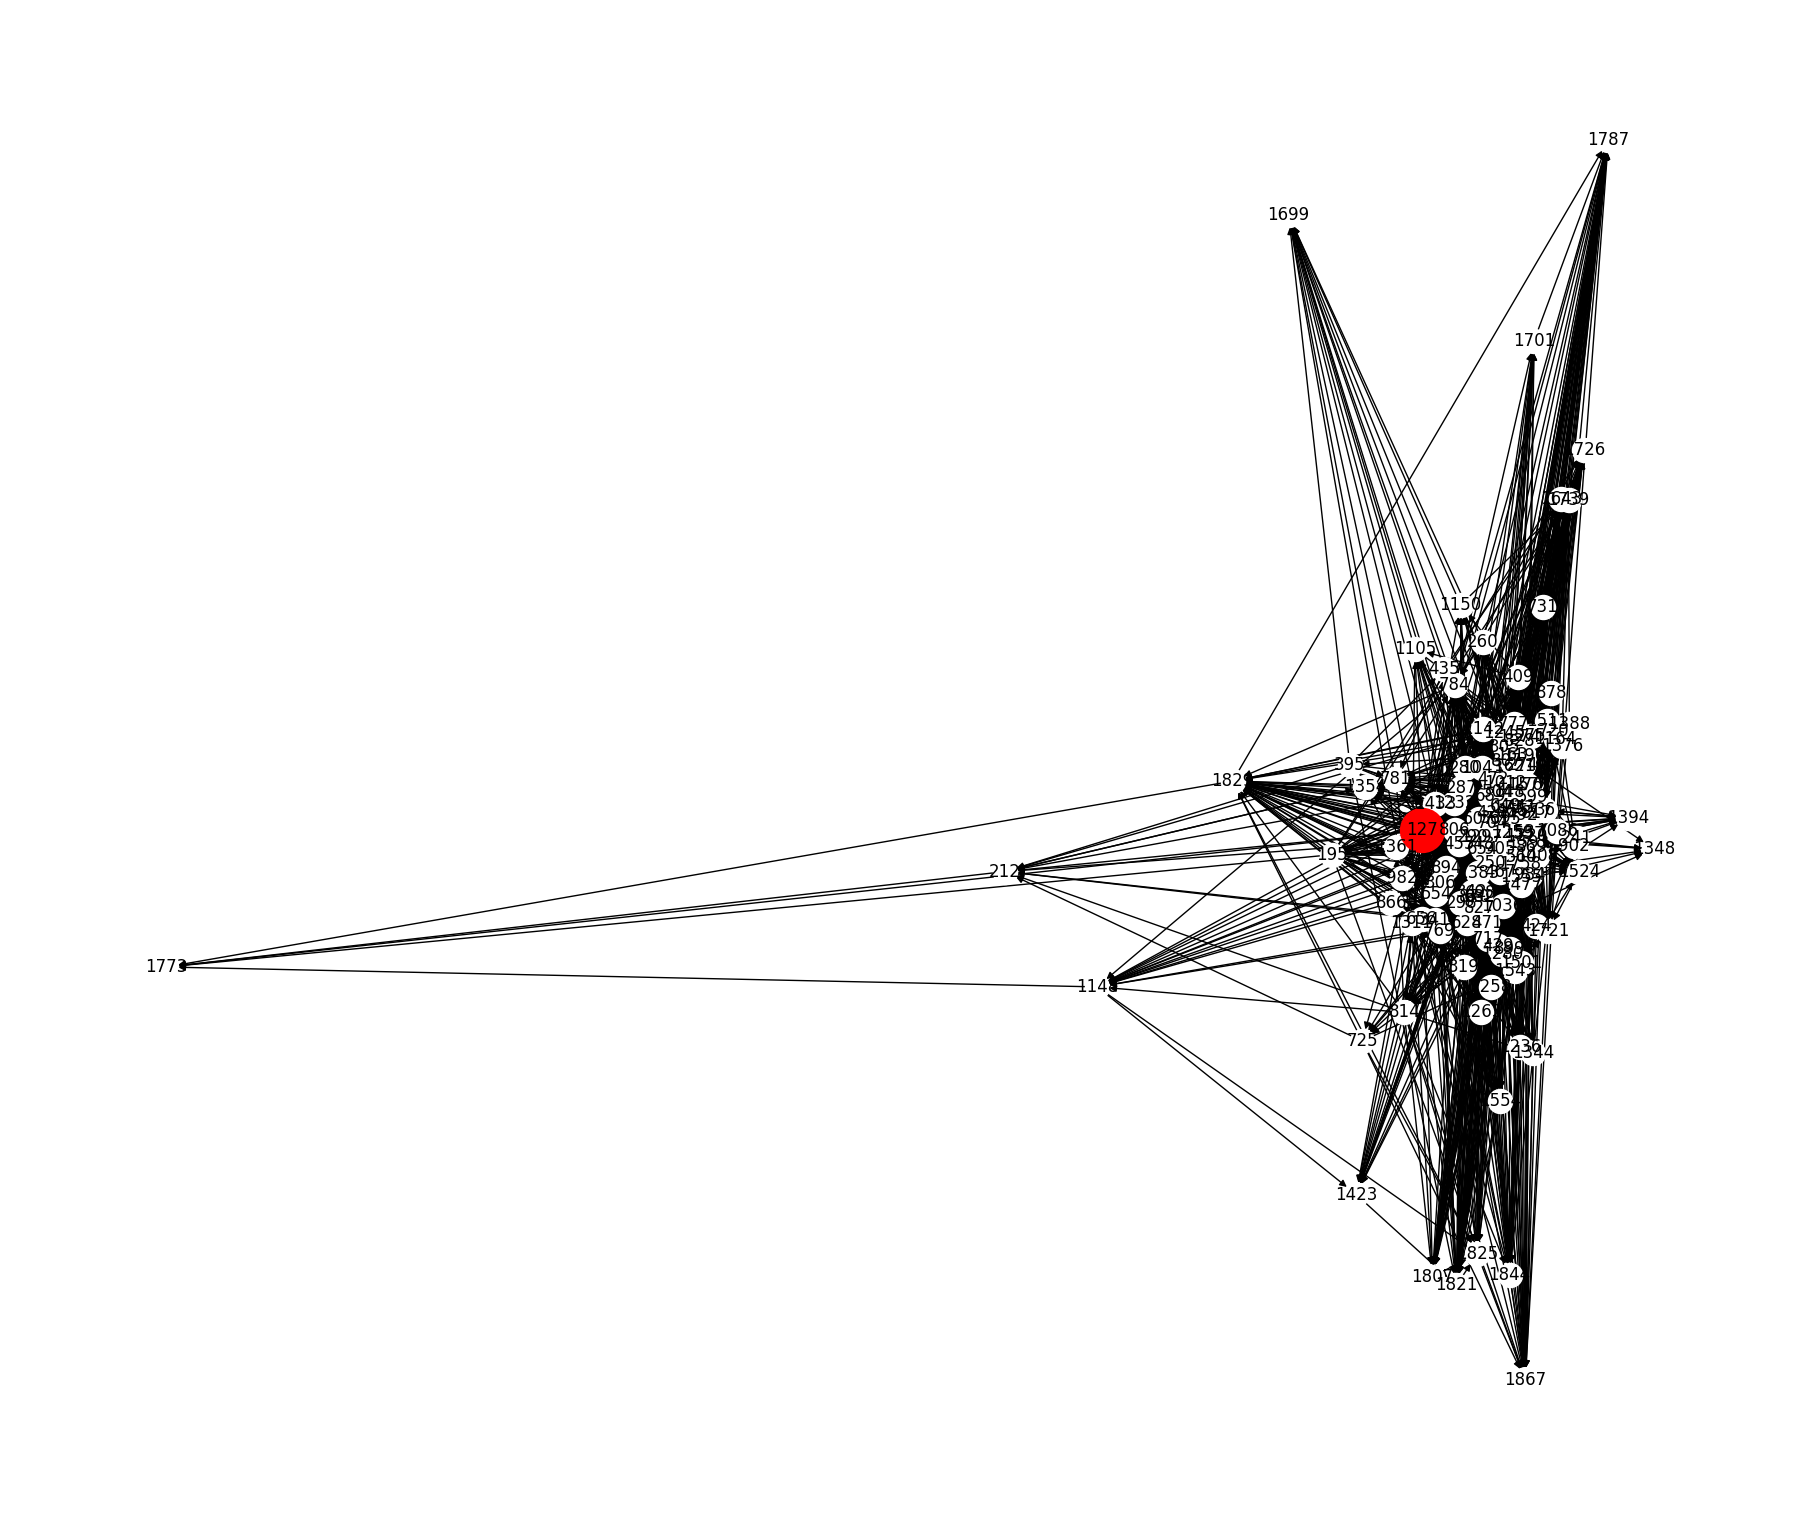

In [75]:
#Ego network della rete completa
plt.figure(figsize=(18, 15))
node_and_degree = graph.degree()
(largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Crea l'ego network dal componente principale (largest hub)
hub_ego = nx.ego_graph(graph, largest_hub)

# Plotta i nodi attorno al nodo ego
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)

# Plotta il nodo ego (grande rosso)
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=1000, node_color='r')
plt.show()

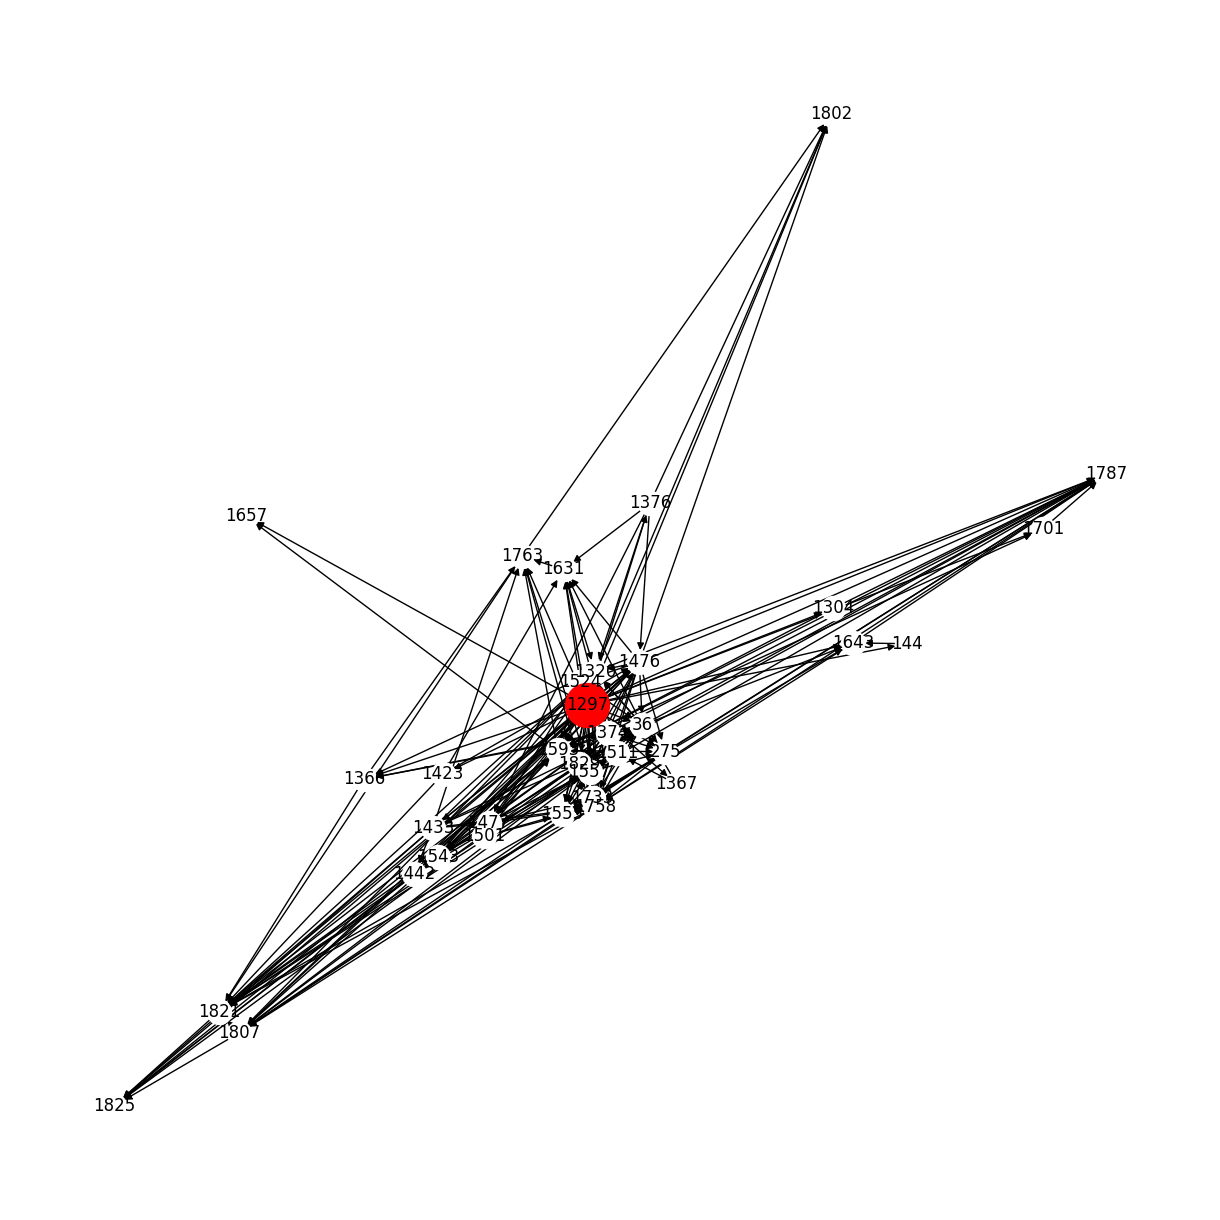

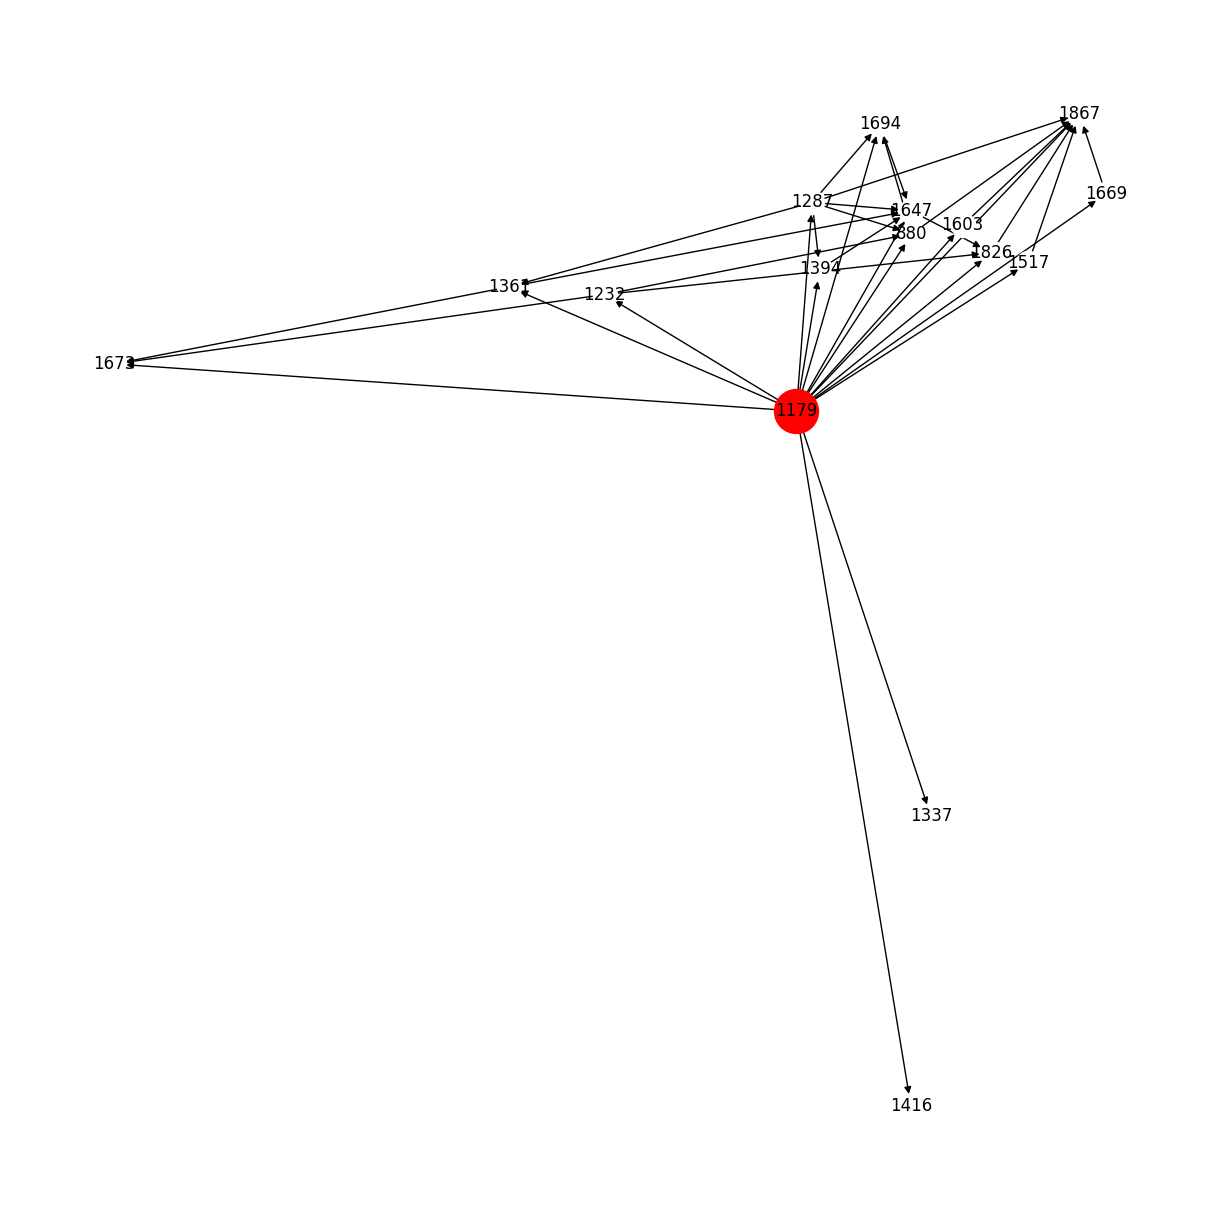

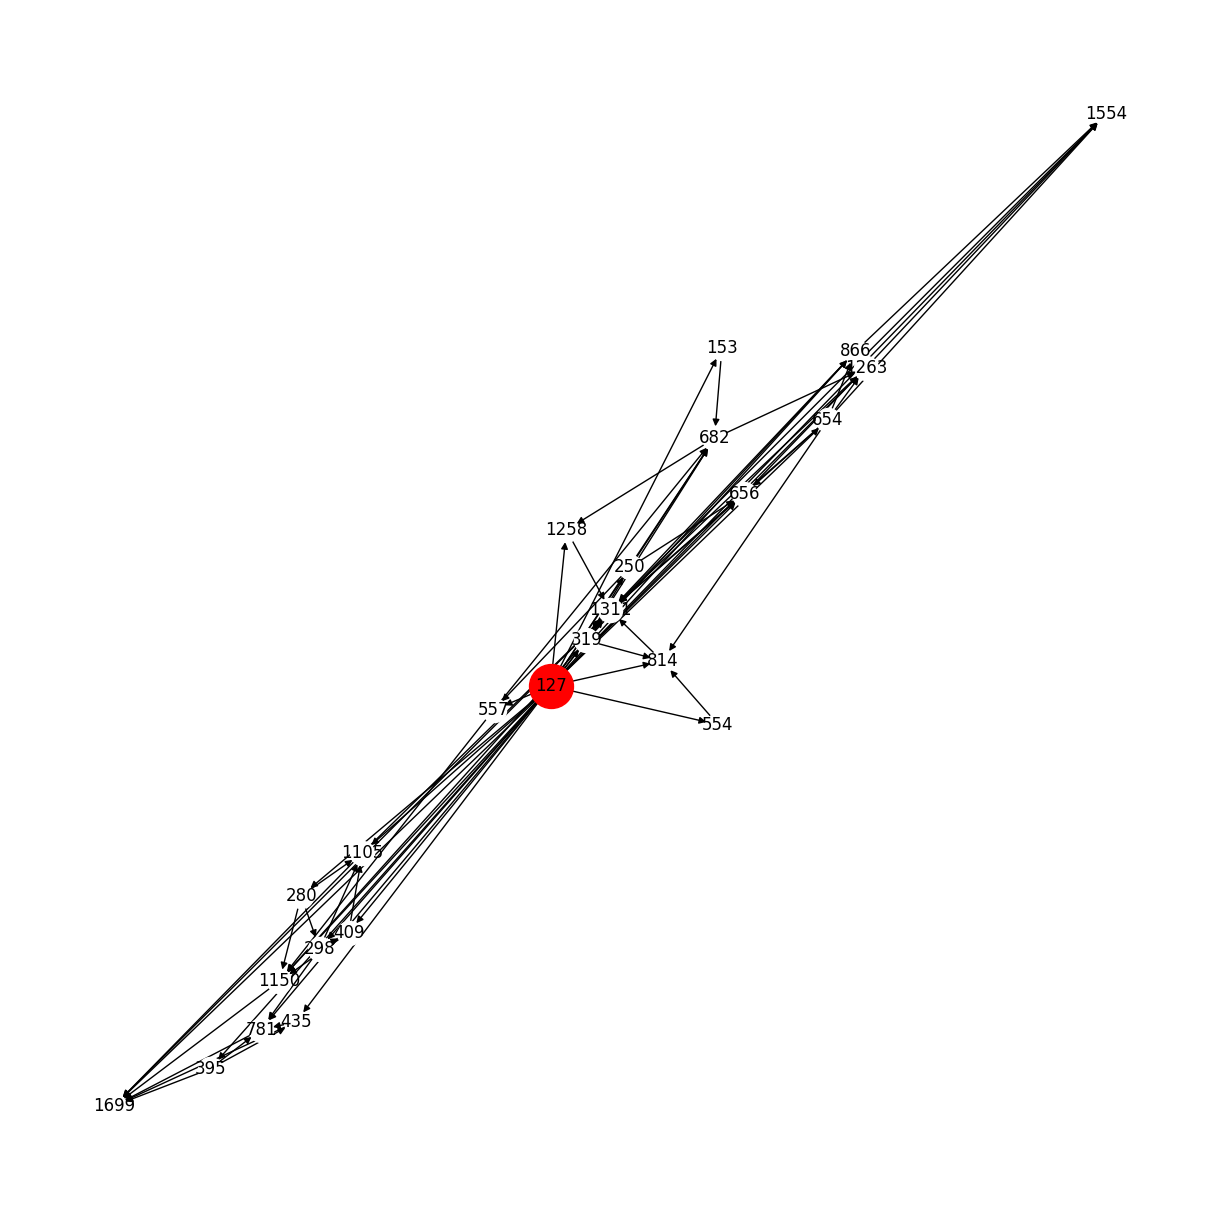

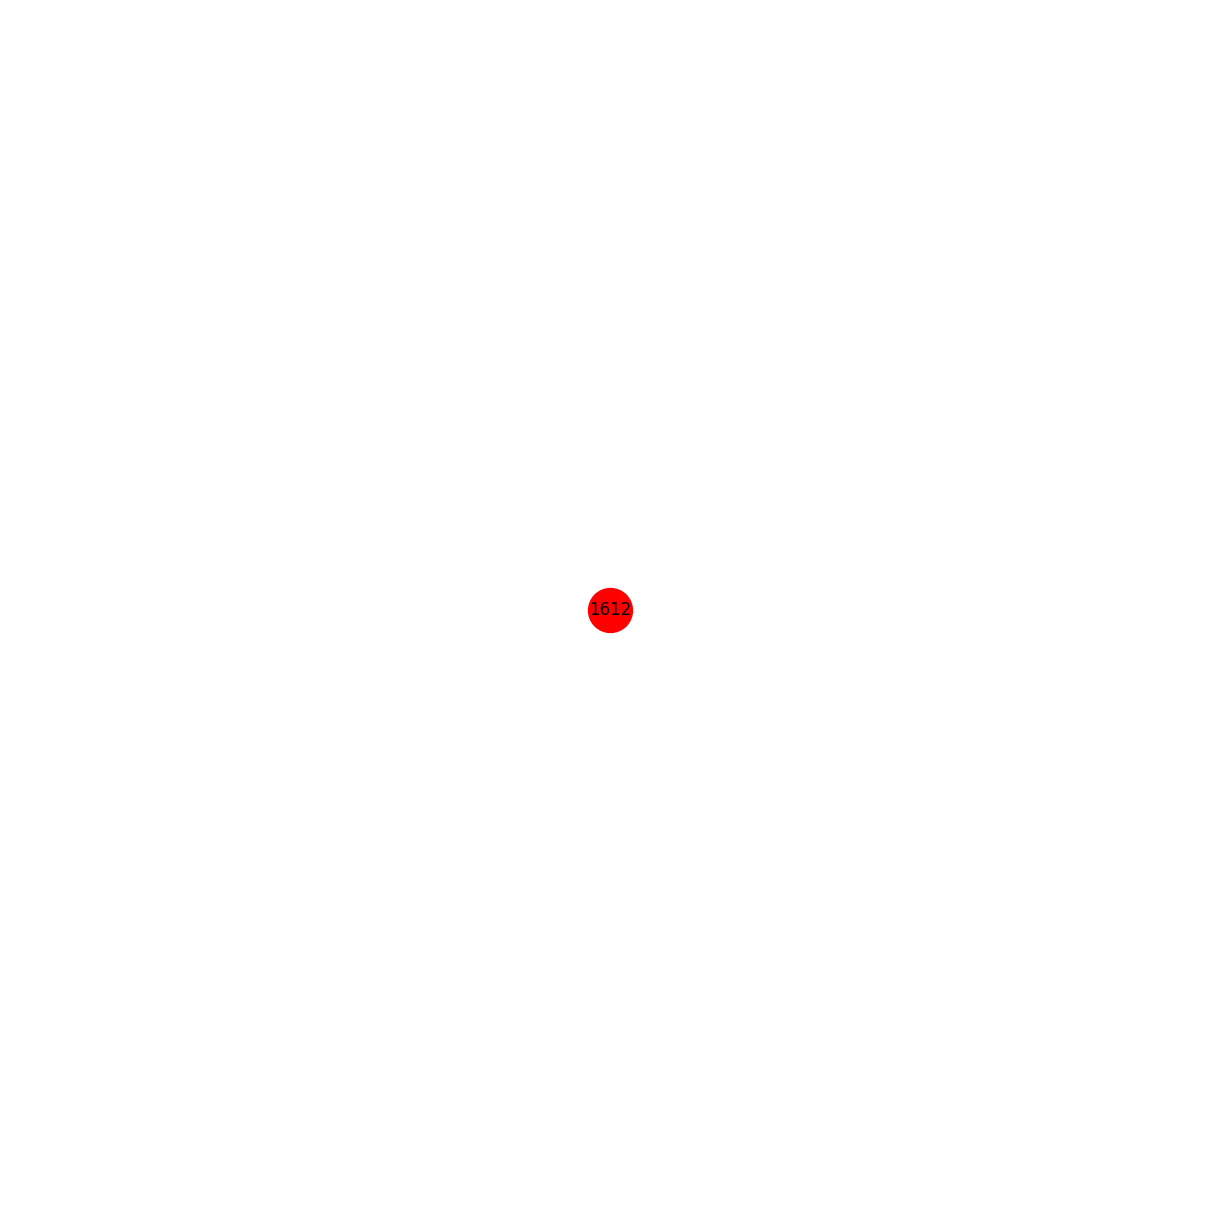

In [77]:
#Ego network delle singole community
count = 1
for community in communities:
    if len(community) == 1:
        continue
    edge = caricamento(community)
    community_graph = grafo(community,edge)
    plt.figure(figsize=(12, 12))
    node_and_degree = community_graph.degree()
    (largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]

    # Crea l'ego network dal componente principale (largest hub)
    hub_ego = nx.ego_graph(community_graph, largest_hub)

    # Plotta i nodi attorno al nodo ego
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)

    # Plotta il nodo ego (grande rosso)
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=1000, node_color='r')
    plt.show()